## Подключение библиотек и пакетов

In [57]:
import numpy as np
import pandas as pd
import os
from time import time

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка предобработанных данных

Настройка глобальных переменных

In [58]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/car_price')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/car_price')


img_dir = os.path.join(os.getcwd(), 'graphics')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

Загрузка данных с репозитория

Чтение и просмотр данных

In [59]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/car_price https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv

--2021-06-12 09:49:38--  https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 438317 (428K) [text/plain]
Saving to: ‘data/car_price/car_price_prepocessed.csv’

car_price_prepocess 100%[===================>] 428.04K  --.-KB/s    in 0.02s   

2021-06-12 09:49:38 (17.9 MB/s) - ‘data/car_price/car_price_prepocessed.csv’ saved [438317/438317]



Чтение данных

In [60]:
df = pd.read_csv(os.path.join(data_dir, 'car_price_prepocessed.csv'))
df.head()

km  price  Audi A1  ...  Tuned car  Voice Control  Winter tyres
0  56013  15770        1  ...          0              1             0
1  80000  14500        1  ...          0              1             0
2  83450  14640        1  ...          0              1             0
3  73000  14500        1  ...          0              1             0
4  16200  16790        1  ...          0              1             0

[5 rows x 42 columns]

Разделение данных на матрицу признаков и вектор ответов


In [61]:
y = df['price'].values
x = df.drop(['price'], axis=1).values

Разделение данных на обучающие и тестовые выборки

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Методы машинного обучения для решения задачи регрессии

Подключение необходимых модулей

In [63]:
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error 
from sklearn.metrics import mean_squared_log_error, median_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LinearRegression
from sklearn.svm          import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeRegressor
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

Функция быстрого применения алгоритма машинного обучения

1. Создание модели
2. Обучение модели 
3. Вывод точности работы алгоритма на обучающей выборке
4. Кросс-валидация модели
5. Вывод графика разброса регрессии и сравнение предсказания и тестовых ответов

In [85]:
def fast_start_regression(algorithm, x_train, y_train, x_test, y_test, 
                          scalers: None, algorithm_name: str, fig_title: str, img_dir: str):
  if scalers is None:
    algorithm_name_current = f'{algorithm_name} (not scaled)'
    fig_title_current = f'{fig_title} {algorithm_name_current}'
    pipe = make_pipeline(algorithm)
    __fast_start_regression__(pipe, x_train, y_train, x_test, y_test, 
                              algorithm_name_current, fig_title_current, img_dir)
  else:
    for scaler in scalers.keys():
      algorithm_name_current = f'{algorithm_name} ({scaler})'
      fig_title_current = f'{fig_title} {algorithm_name_current}'
      pipe = make_pipeline(scalers[scaler], algorithm)
      __fast_start_regression__(pipe, x_train, y_train, x_test, y_test,
                                algorithm_name_current, fig_title_current, img_dir)


def __fast_start_regression__(pipe: Pipeline, x_train, y_train, x_test, y_test, 
                              algorithm_name: str, fig_title: str, img_dir: str):
  start_time = time()
  pipe.fit(x_train, y_train)
  end_time = time()
  lreg_fit_time_txt =         f'{algorithm_name} algorithm learning time: {(end_time - start_time):.2f} sec.'

  # оценка работы алгоритма на обучающей выборке
  score_ = pipe.score(x_train, y_train)
  score_txt =                 f'The accuracy of the {algorithm_name} algorithm on a training set: {score_:.2f}'

  # применение кросс-валидации модели
  start_time = time()
  cross_scores_ = cross_val_score(pipe, x_train, y_train, scoring='r2', cv=5)
  end_time = time()
  cross_val_time_txt =        f'Cross validation time: {(end_time - start_time):.2f} sec.'
  cross_val_result_txt =      f'Cross validation results: {(list(map(lambda x: float("{:.2f}".format(x)), cross_scores_)))}'

  y_pred = pipe.predict(x_test)
  r2_score_txt =              f'Regression Score (R2, coefficient of determination): {r2_score(y_test, y_pred):.3f}'
  variance_score_txt =        f'Variance Score: {explained_variance_score(y_test, y_pred):.3f}'
  max_error_txt =             f'Max Error: ${max_error(y_test, y_pred):.3f}'
  mean_absolute_error_txt =   f'Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.3f}'
  mean_squared_error_txt =    f'Mean Squared Error (RMSE): ${mean_squared_error(y_test, y_pred, squared=True):.3f}'
  median_absolute_error_txt = f'Median Absolute Error: ${median_absolute_error(y_test, y_pred):.3f}'

  algorithm_params =          f'Algorithm params: {pipe.named_steps}'

  description = f'{algorithm_params}\
  \n{lreg_fit_time_txt}\
  \n{score_txt}\
  \n{cross_val_time_txt}\
  \n{cross_val_result_txt}\
  \n{r2_score_txt}\
  \n{variance_score_txt}\
  \n{max_error_txt}\
  \n{mean_absolute_error_txt}\
  \n{mean_squared_error_txt}\
  \n{median_absolute_error_txt}'

  print(f'{description}\n')

  # построение графика разброса регресии предсказанной и имеющейся тестовой
  data = np.concatenate([x_test[:, 0].reshape(-1, 1), y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)
  df_data = pd.DataFrame(data, columns=['x_test', 'y_test', 'y_pred'])

  km_to_price, ax = plt.subplots(figsize=(15, 12))
  sns.regplot(x='x_test', y='y_pred', data=df_data, label='Prediction Y', marker='.', ax=ax)
  sns.regplot(x='x_test', y='y_test', data=df_data, label='Test Y', marker='.', ax=ax)
  ax.set_ylabel('Price, $')
  ax.set_xlabel('Kilometers')
  ax.set_title(fig_title)
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  ax.text(x=-0.01, y=-0.45, s=description, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)
  ax.legend()

  plt.savefig(os.path.join(img_dir, f'{fig_title}.png'), bbox_inches='tight')

Функция для поиска наилучших параметров через инструмент GridSearchCV

In [73]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def search_best_params(lreg_algorithm, param_grid, x_train, y_train, algorithm_name: str, cv=None):
  search = GridSearchCV(lreg_algorithm, param_grid,
                        scoring=make_scorer(r2_score),
                        n_jobs=-11, cv=cv)
  start_time = time()
  results = search.fit(x_train, y_train)
  end_time = time()

  print(f'Mean Accuracy: {results.best_score_:.3f}')
  print('Config: %s' % results.best_params_)
  print(f'Time to find parameters for the {algorithm_name} algorithm through the use of GridSearchCV: {(end_time - start_time):.2f} sec.')

Словарь функций масштабирования данных

In [77]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer()
}

### Метод опорных векторов (SVM)

Применение метода опорных векторов для неотмасштабированнных данных

Algorithm params: {'pipeline': Pipeline(memory=None,
         steps=[('svr',
                 SVR(C=10, cache_size=200, coef0=1.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='poly', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)}  
SVM (not scaled) algorithm learning time: 1.11 sec.  
The accuracy of the SVM (not scaled) algorithm on a training set: 0.39  
Cross validation time: 3.87 sec.  
Cross validation results: [0.4, 0.43, 0.29, 0.43, 0.33]  
Regression Score (R2, coefficient of determination): 0.358  
Variance Score: 0.361  
Max Error: $34394.480  
Mean Absolute Error: $2699.884  
Mean Squared Error (RMSE): $13219174.077  
Median Absolute Error: $2201.854



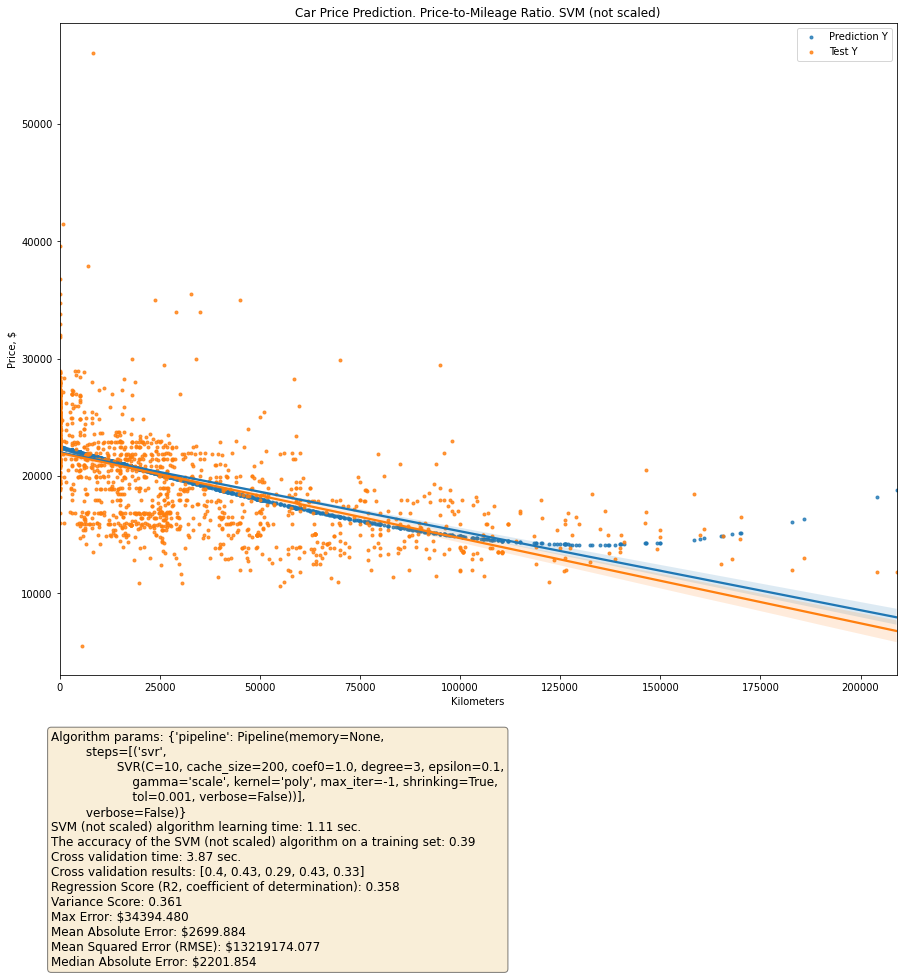

In [86]:
algorithm_name = 'SVM'
pipe = make_pipeline(SVR(kernel='poly', C=10, coef0=1.0, gamma='scale', max_iter=-1))
fast_start_regression(pipe, x_train, y_train, x_test, y_test, None, algorithm_name, 
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Поиск лучшего сочетания гиперпараметров модели из заданных с использованием инструмента GridSearchCV. На вход подаются данные, где матрица признаков `X` отмасштабирована с помощью инстумента StandardScaler. Это сделано, чтобы ускорить сходимость алгоритма, т.к. метод опорных векторов требует масштабирования данных для сходимости алгоритма.

In [ ]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
# x_test_std = std.fit_transform(x_test)

svm_param_grid = { 
      'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
      'C': [1, 5, 10],
      'gamma': ('scale', 'auto'),
      'coef0': [0.0, 0.5, 1.0]
  }

lreg_svm = SVR()
search_best_params(lreg_svm, svm_param_grid, x_train_std, y_train, 'SVM')

Mean Accuracy: 0.672
Config: {'C': 10, 'coef0': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Time to find parameters for the SVM algorithm through the use of GridSearchCV: 319.94 sec.


Применение метода опорных векторов для данных, отмасштабированных разными функциями SkLearn

Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'svr': SVR(C=10, cache_size=200, coef0=1.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}  
SVM (StandardScaler) algorithm learning time: 1.10 sec.  
The accuracy of the SVM (StandardScaler) algorithm on a training set: 0.52  
Cross validation time: 3.86 sec.  
Cross validation results: [0.49, 0.5, 0.44, 0.47, 0.42]  
Regression Score (R2, coefficient of determination): 0.500  
Variance Score: 0.505  
Max Error: $25335.663  
Mean Absolute Error: $2393.652  
Mean Squared Error (RMSE): $10301248.396  
Median Absolute Error: $1964.938

Algorithm params: {'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'svr': SVR(C=10, cache_size=200, coef0=1.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}  
SVM (MinMaxScaler) algorithm learning time: 1.01 sec.  
Th

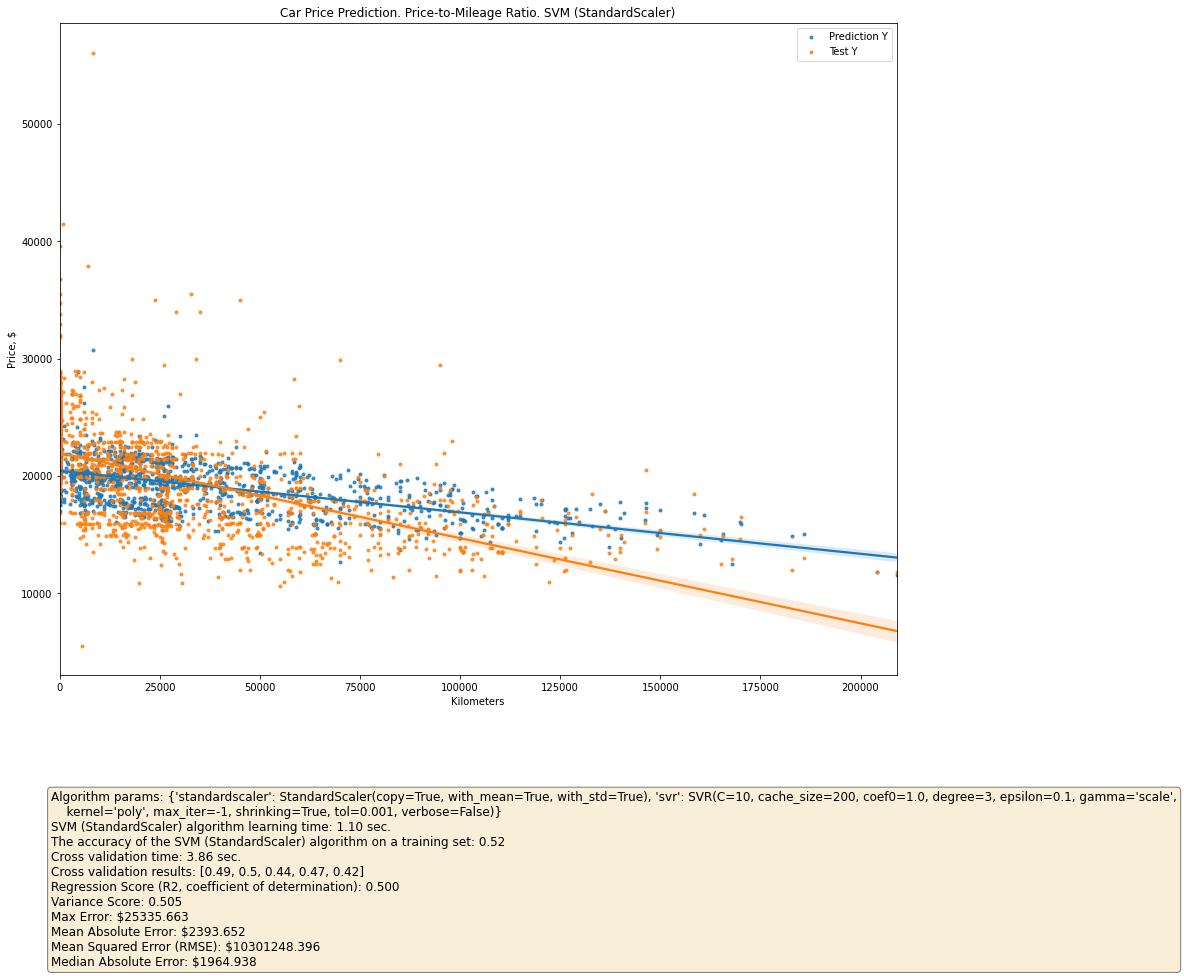

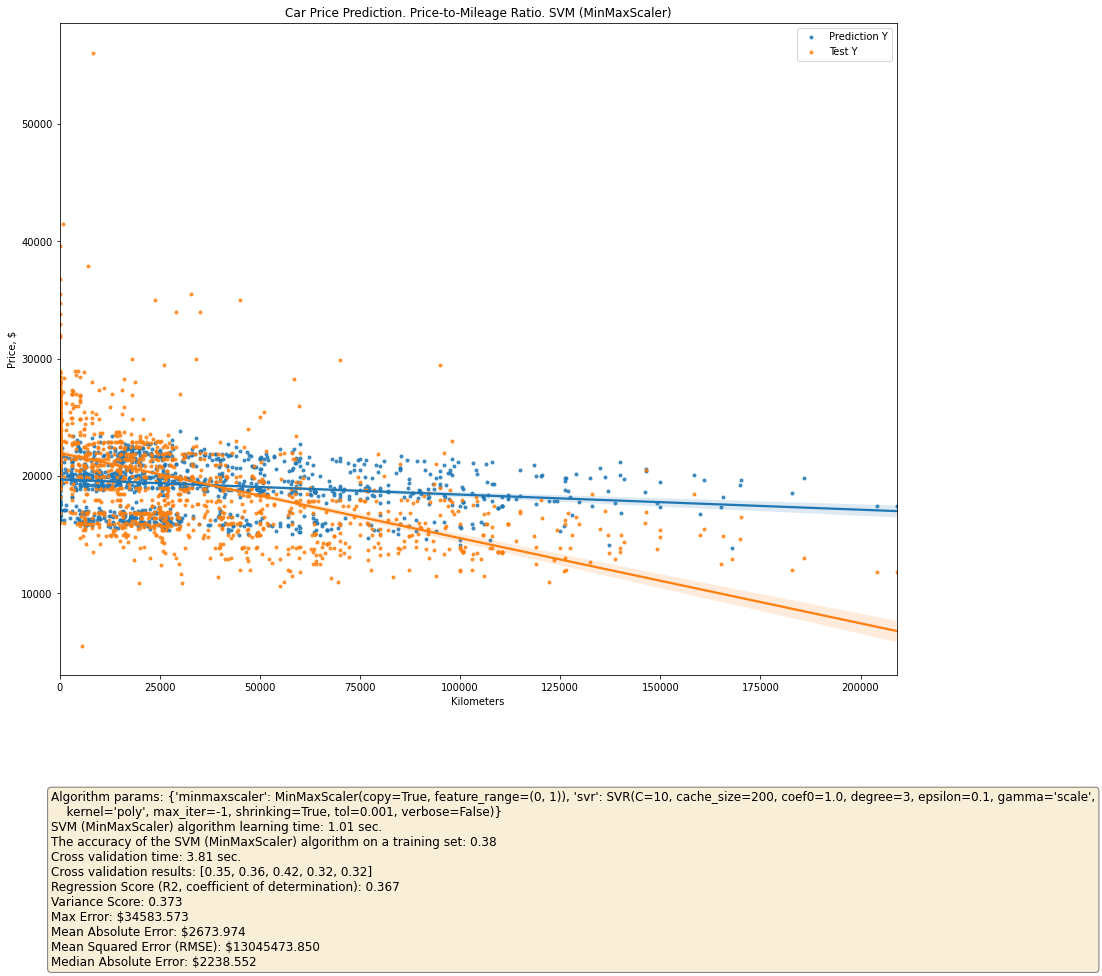

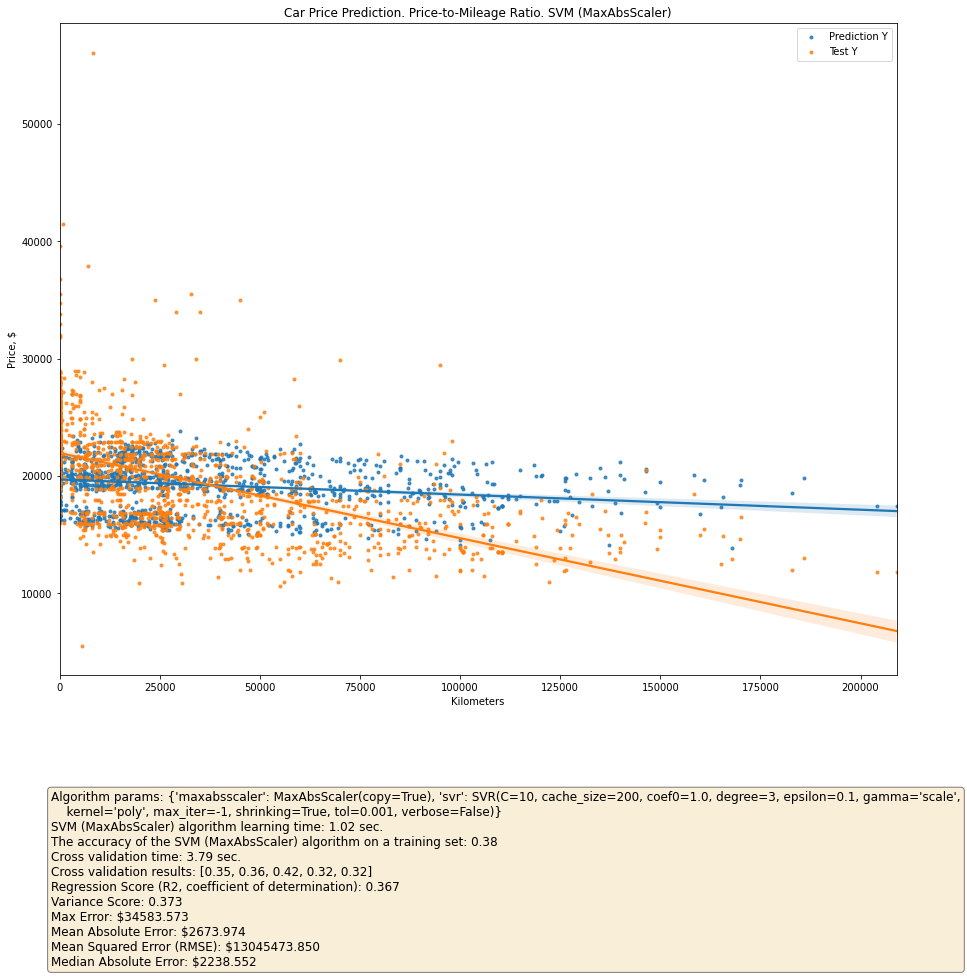

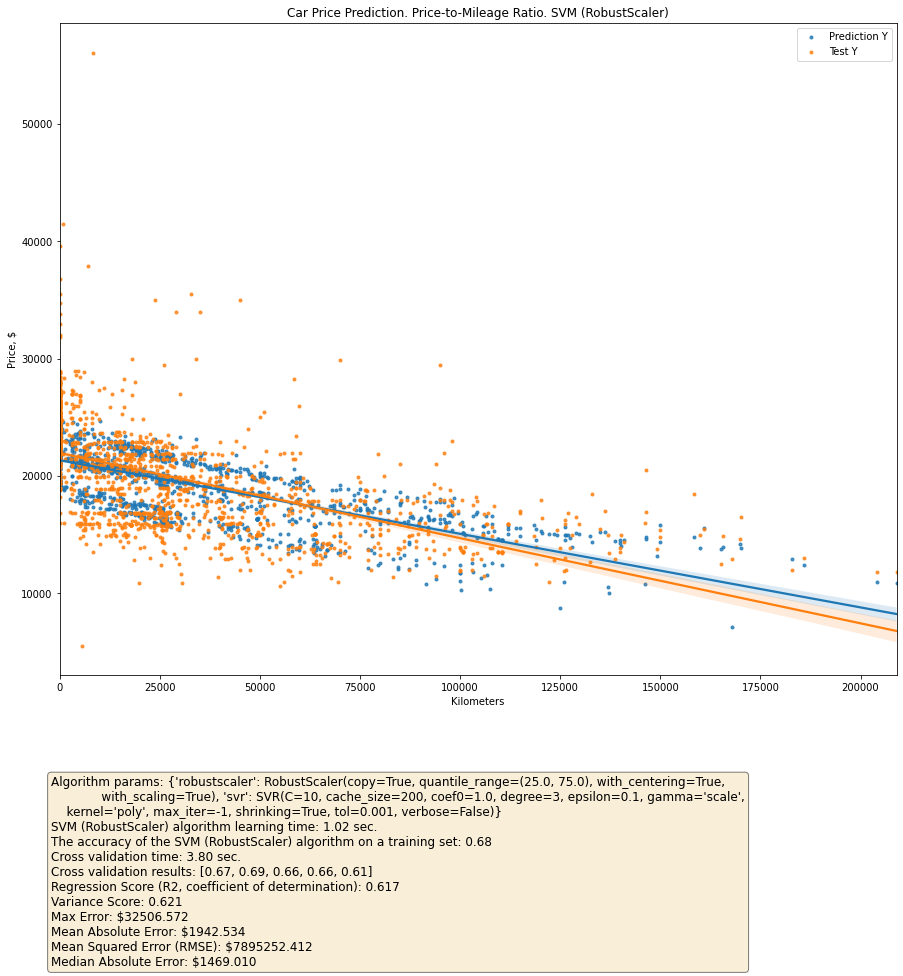

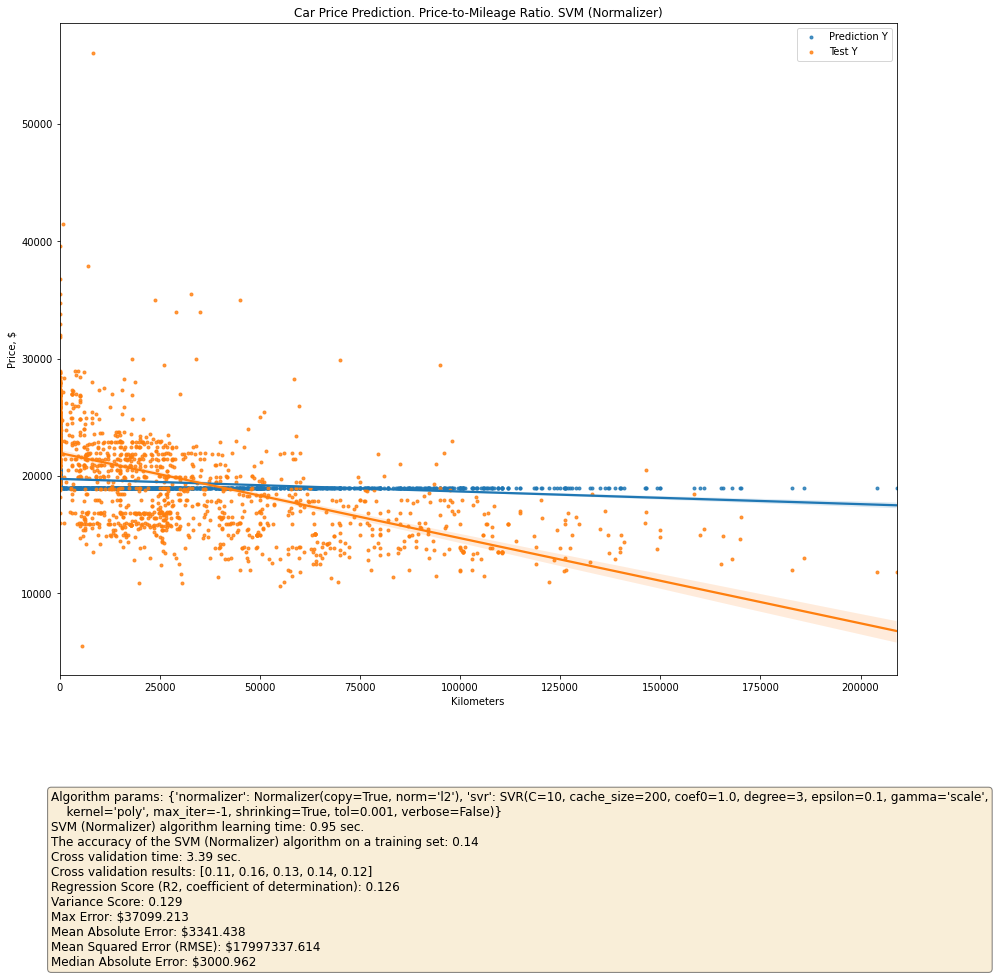

In [87]:
algorithm_name = 'SVM'
algorithm = SVR(kernel='poly', C=10, coef0=1.0, gamma='scale', max_iter=-1)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

### Логистическая регрессия

Применение логистической регрессии для неотмасштабированнных данных

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (not scaled) algorithm learning time: 15.81 sec.  
The accuracy of the Logistic Regression (not scaled) algorithm on a training set: 0.01  
Cross validation time: 56.31 sec.  
Cross validation results: [-1.74, -1.82, -1.99, -1.86, -0.62]  
Regression Score (R2, coefficient of determination): -1.528  
Variance Score: 0.030  
Max Error: $42600.000  
Mean Absolute Error: $5834.017  
Mean Squared Error (RMSE): $52070840.148  
Median Absolute Error: $5290.000



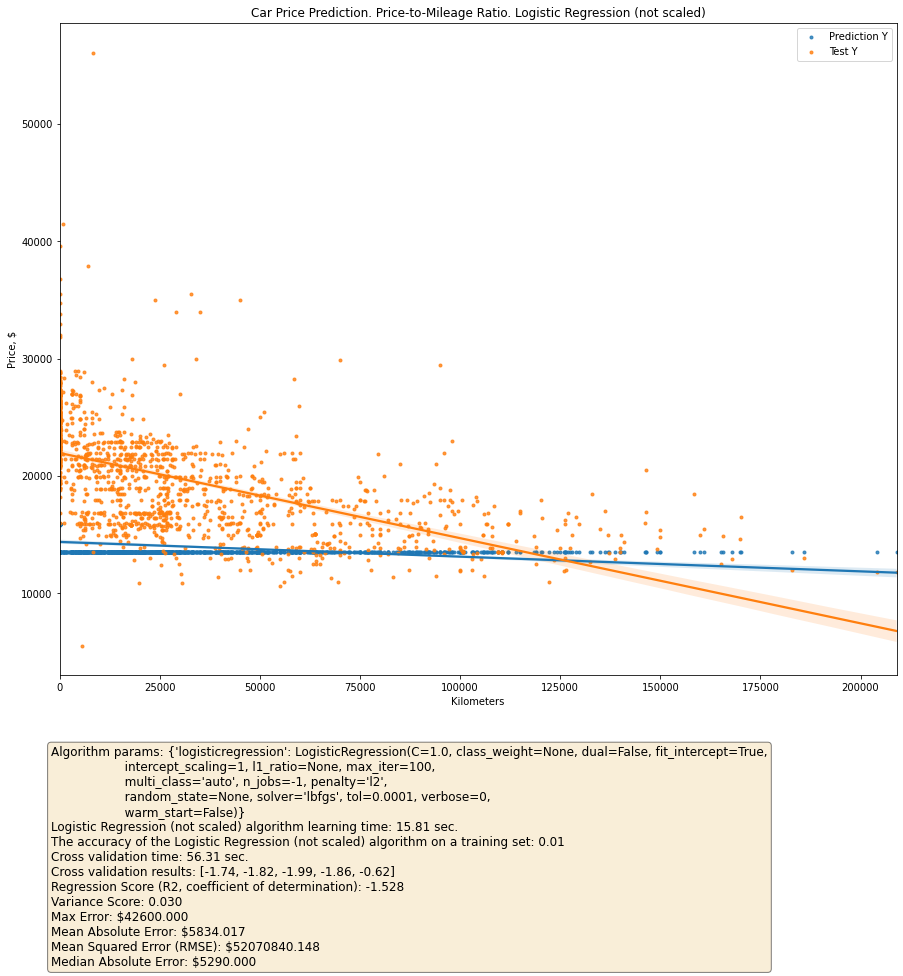

In [99]:
algorithm_name = 'Logistic Regression'
algorithm = LogisticRegression(penalty='l2', n_jobs=-1)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, None, algorithm_name, 
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Применение логистической регрессии для данных, отмасштабированных разными функциями SkLearn

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (StandardScaler) algorithm learning time: 15.68 sec.  
The accuracy of the Logistic Regression (StandardScaler) algorithm on a training set: 0.31  
Cross validation time: 54.91 sec.  
Cross validation results: [0.43, 0.4, 0.4, 0.45, 0.43]  
Regression Score (R2, coefficient of determination): 0.497  
Variance Score: 0.500  
Max Error: $25200.000  
Mean Absolute Error: $2193.131  
Mean Squared Error (RMSE): $10352395.965  
Median Absolute Error: $1490.000



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (MinMaxScaler) algorithm learning time: 15.13 sec.  
The accuracy of the Logistic Regression (MinMaxScaler) algorithm on a training set: 0.14  
Cross validation time: 55.06 sec.  
Cross validation results: [0.13, 0.11, 0.05, 0.31, 0.13]  
Regression Score (R2, coefficient of determination): 0.177  
Variance Score: 0.177  
Max Error: $35200.000  
Mean Absolute Error: $2946.195  
Mean Squared Error (RMSE): $16947065.553  
Median Absolute Error: $2105.000



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'maxabsscaler': MaxAbsScaler(copy=True), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (MaxAbsScaler) algorithm learning time: 15.03 sec.  
The accuracy of the Logistic Regression (MaxAbsScaler) algorithm on a training set: 0.14  
Cross validation time: 54.91 sec.  
Cross validation results: [0.13, 0.11, 0.05, 0.31, 0.13]  
Regression Score (R2, coefficient of determination): 0.176  
Variance Score: 0.177  
Max Error: $35200.000  
Mean Absolute Error: $2947.653  
Mean Squared Error (RMSE): $16961936.665  
Median Absolute Error: $2105.000



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'robustscaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (RobustScaler) algorithm learning time: 15.33 sec.  
The accuracy of the Logistic Regression (RobustScaler) algorithm on a training set: 0.16  
Cross validation time: 50.81 sec.  
Cross validation results: [0.49, 0.55, 0.51, 0.52, 0.51]  
Regression Score (R2, coefficient of determination): 0.451  
Variance Score: 0.452  
Max Error: $35200.000  
Mean Absolute Error: $2260.847  
Mean Squared Error (RMSE): $11307884.165  
Median Absolute Error: $1529.000



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Algorithm params: {'normalizer': Normalizer(copy=True, norm='l2'), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}  
Logistic Regression (Normalizer) algorithm learning time: 9.39 sec.  
The accuracy of the Logistic Regression (Normalizer) algorithm on a training set: 0.02  
Cross validation time: 30.54 sec.  
Cross validation results: [-0.02, -0.14, -0.14, -0.09, -0.1]  
Regression Score (R2, coefficient of determination): -0.106  
Variance Score: 0.112  
Max Error: $34600.000  
Mean Absolute Error: $3785.862  
Mean Squared Error (RMSE): $22774554.509  
Median Absolute Error: $3500.500



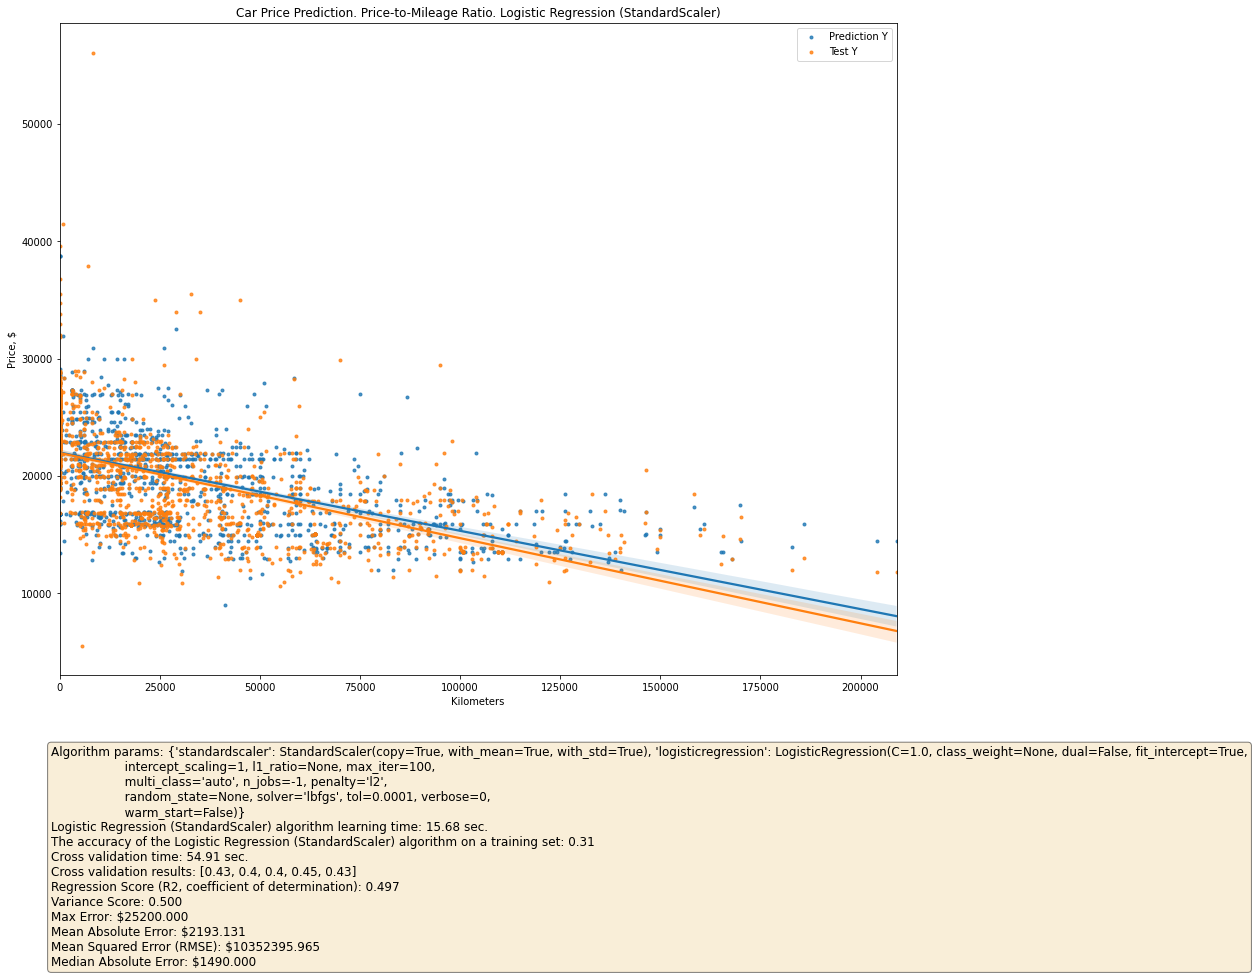

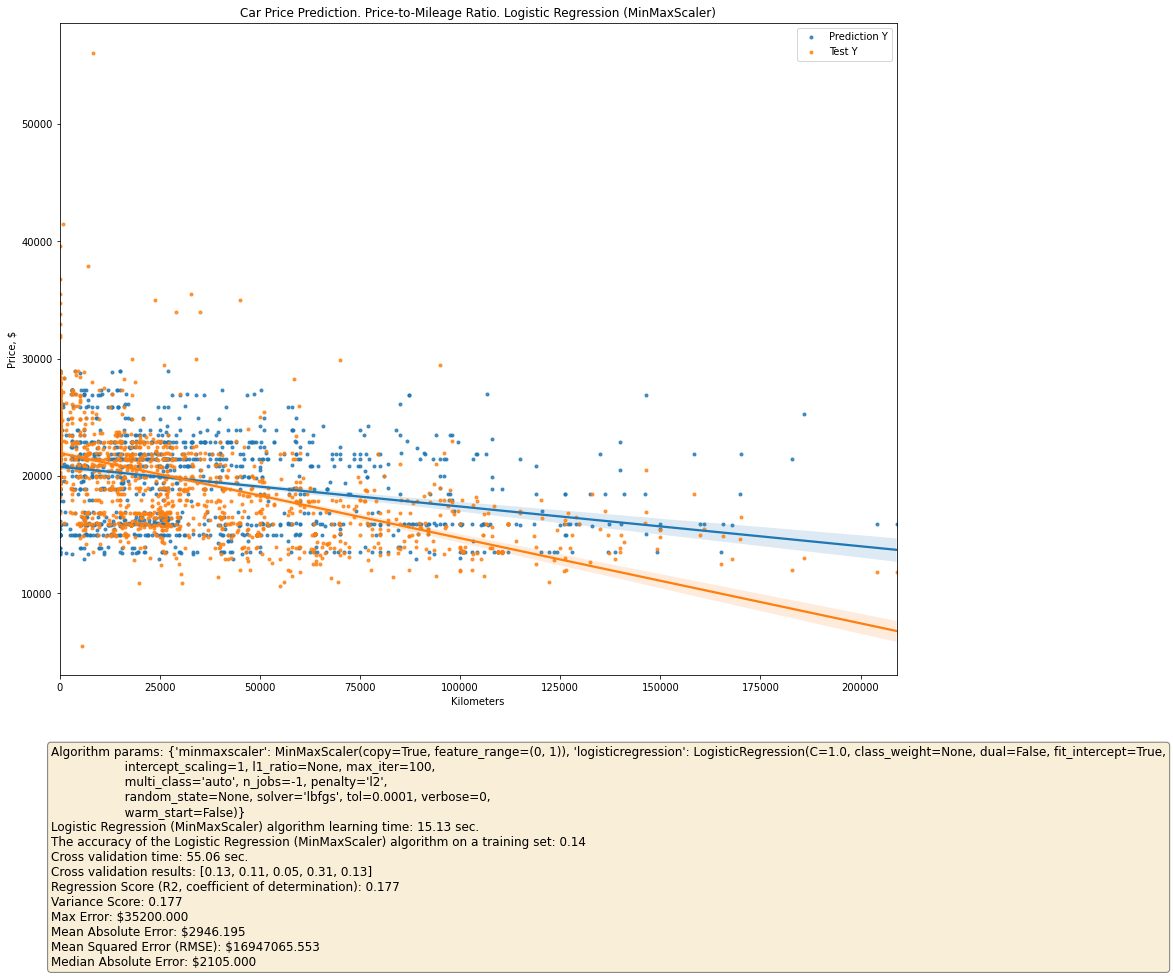

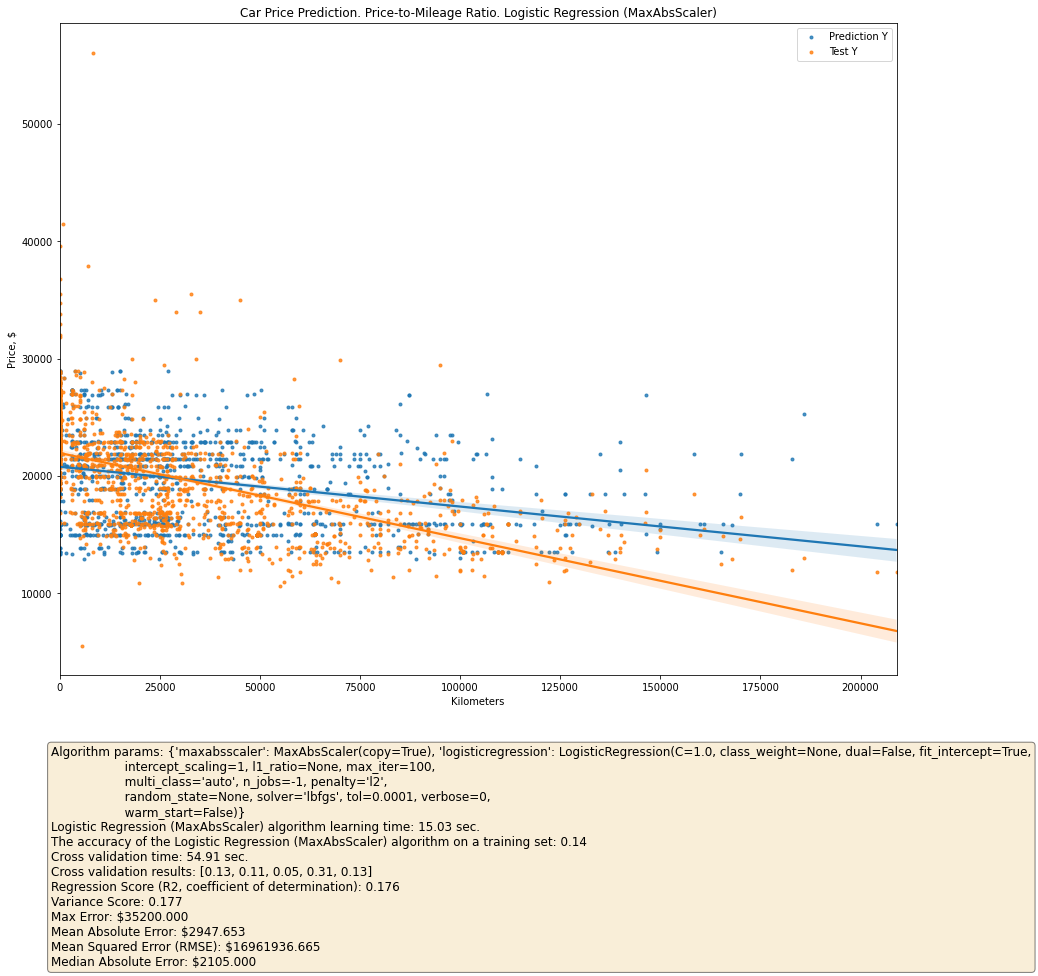

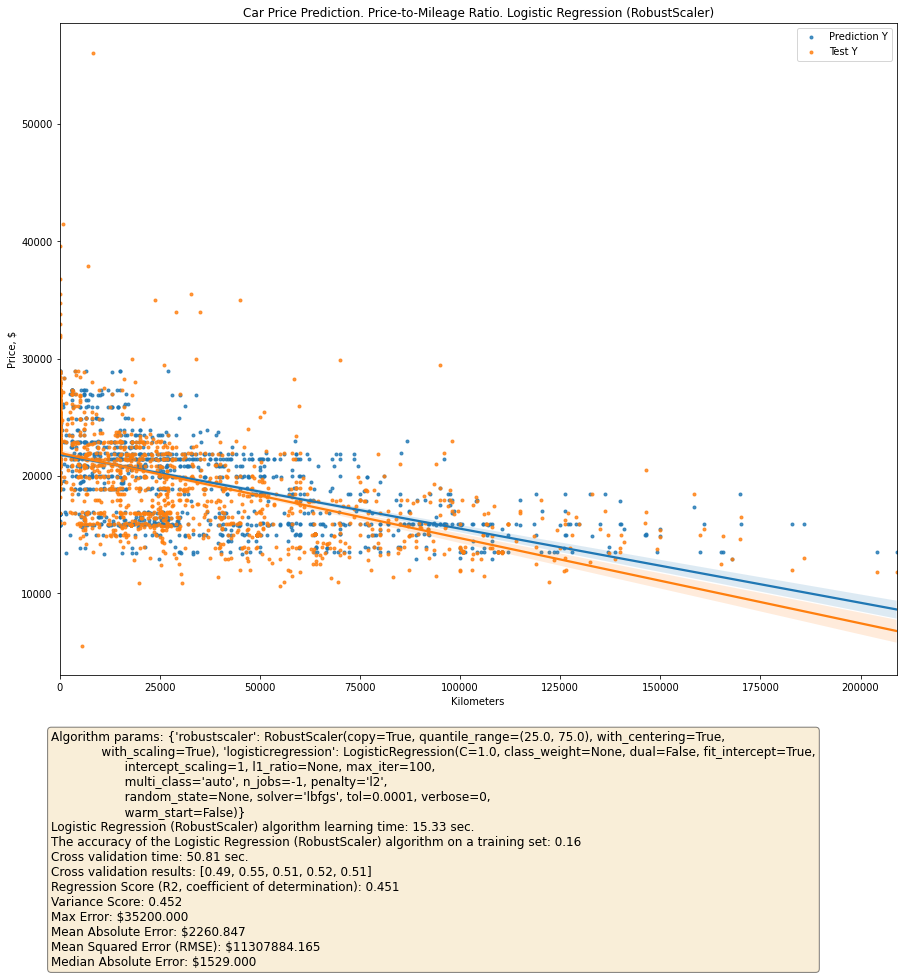

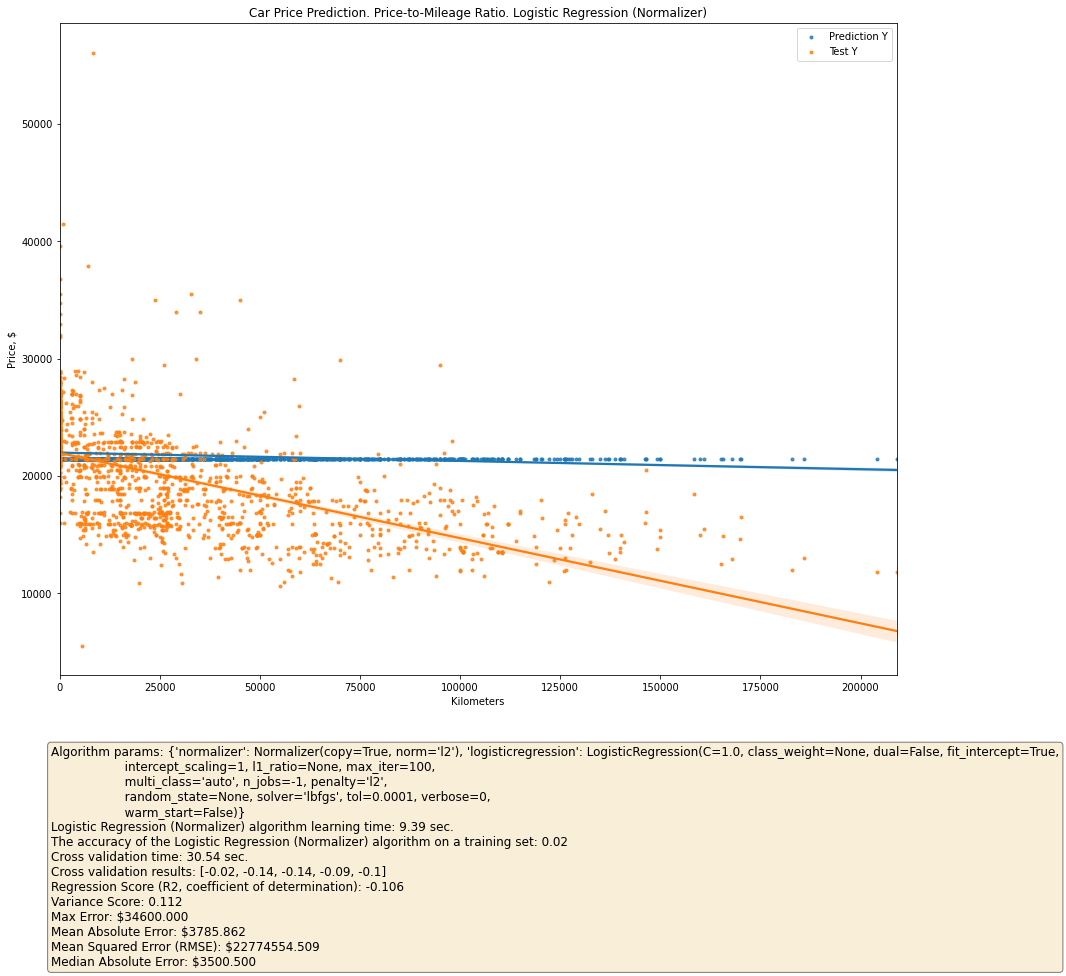

In [100]:
algorithm_name = 'Logistic Regression'
algorithm = LogisticRegression(penalty='l2', n_jobs=-1)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

### Дерево решений

Поиск лучшего сочетания гиперпараметров модели из заданных с использованием инструмента GridSearchCV

In [ ]:
dtree_param_grid = { 
      'criterion': ('mse', 'friedman_mse', 'mae'),
      'splitter': ('best', 'random'),
      'max_depth': [None, 5, 10, 20, 50],
      'max_features': ('auto', 'sqrt', 'log2')
  }

lreg_dtree = DecisionTreeRegressor(random_state=42)
search_best_params(lreg_dtree, dtree_param_grid, x_train, y_train, 'Decision Tree Regressor')

Mean Accuracy: 0.772
Config: {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
Time to find parameters for the Decision Tree Regressor algorithm through the use of GridSearchCV: 28.20 sec.


Применение методы дерева решений для неотмасштабированнных данных

Algorithm params: {'decisiontreeregressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')}  
Decision Tree Regressor (not scaled) algorithm learning time: 0.01 sec.  
The accuracy of the Decision Tree Regressor (not scaled) algorithm on a training set: 0.81  
Cross validation time: 0.04 sec.  
Cross validation results: [0.76, 0.8, 0.77, 0.78, 0.75]  
Regression Score (R2, coefficient of determination): 0.734  
Variance Score: 0.734  
Max Error: $30361.315  
Mean Absolute Error: $1598.146  
Mean Squared Error (RMSE): $5484648.943  
Median Absolute Error: $1186.769



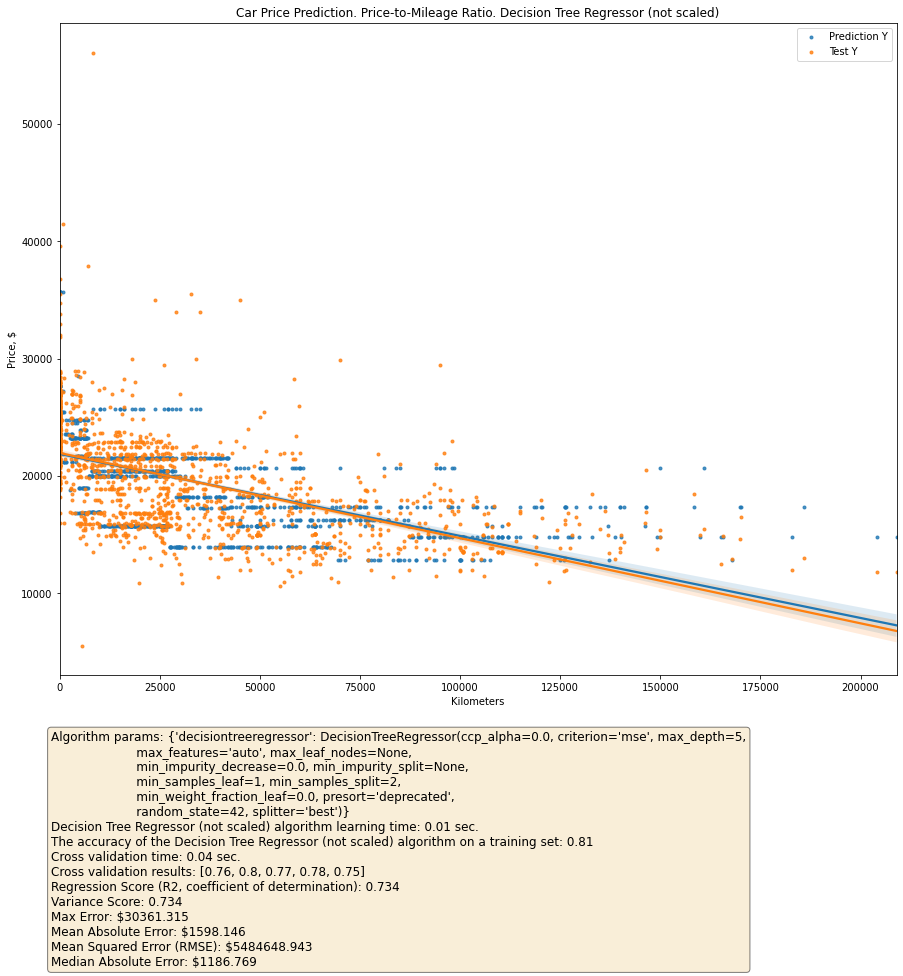

In [90]:
algorithm_name = 'Decision Tree Regressor'
algorithm = DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto', splitter='best', random_state=42)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, None, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Применение дерева решений для данных, отмасштабированных разными функциями SkLearn

Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'decisiontreeregressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')}  
Decision Tree Regressor (StandardScaler) algorithm learning time: 0.02 sec.  
The accuracy of the Decision Tree Regressor (StandardScaler) algorithm on a training set: 0.81  
Cross validation time: 0.05 sec.  
Cross validation results: [0.76, 0.8, 0.77, 0.78, 0.75]  
Regression Score (R2, coefficient of determination): 0.734  
Variance Score: 0.734  
Max Error: $30361.315  
Mean Absolute Error: $1598.146  
Mean Squared Error (RMSE): $5484648.943  
Median Absolute Error: $118

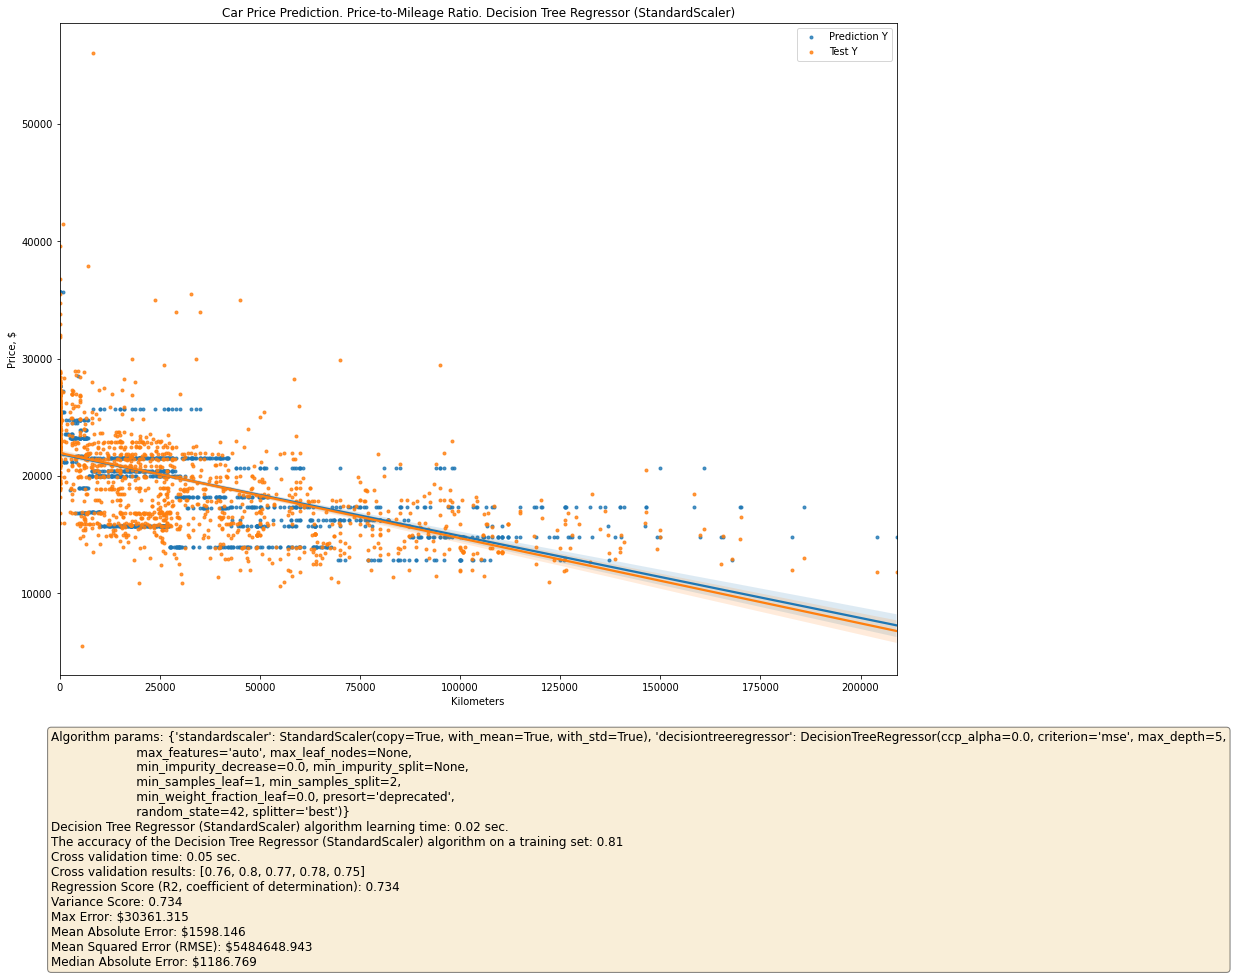

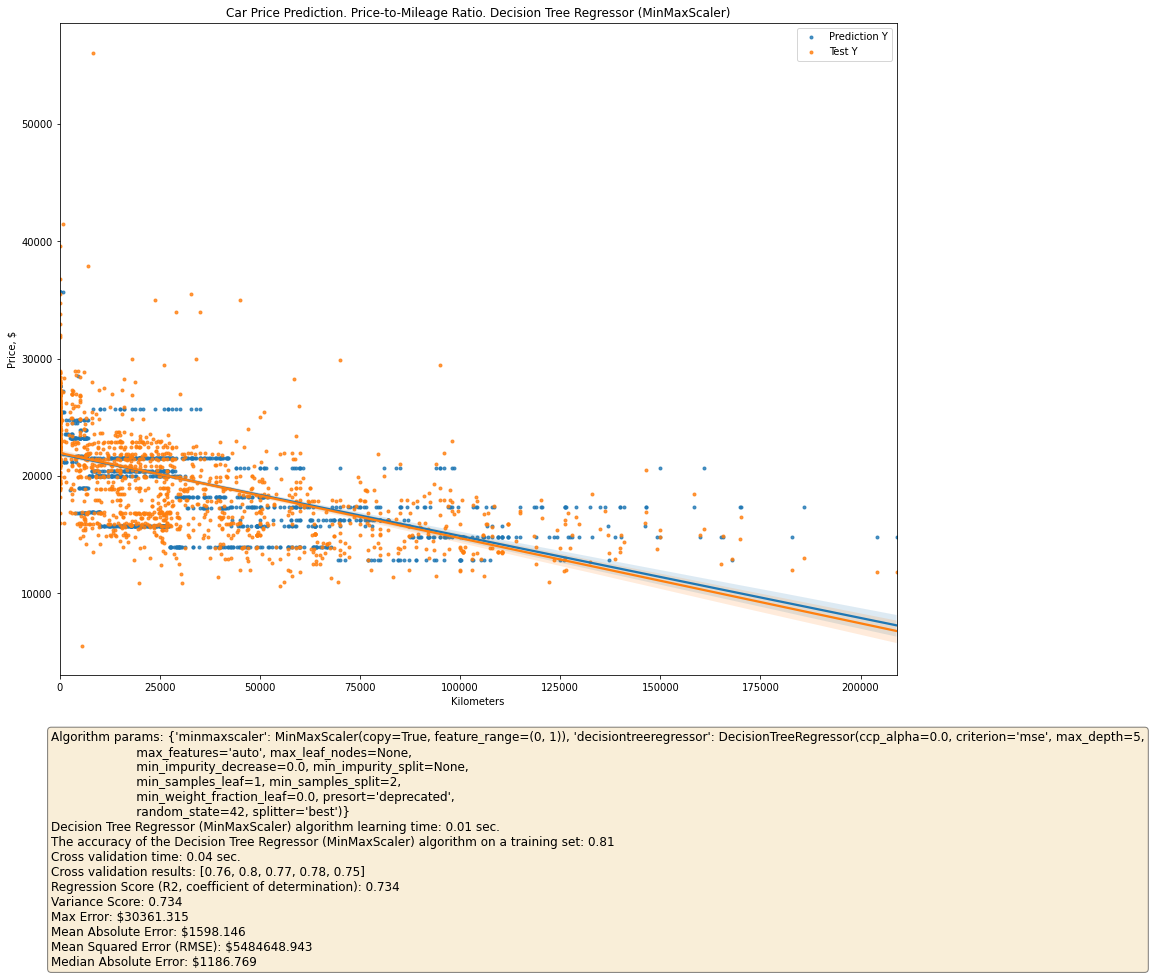

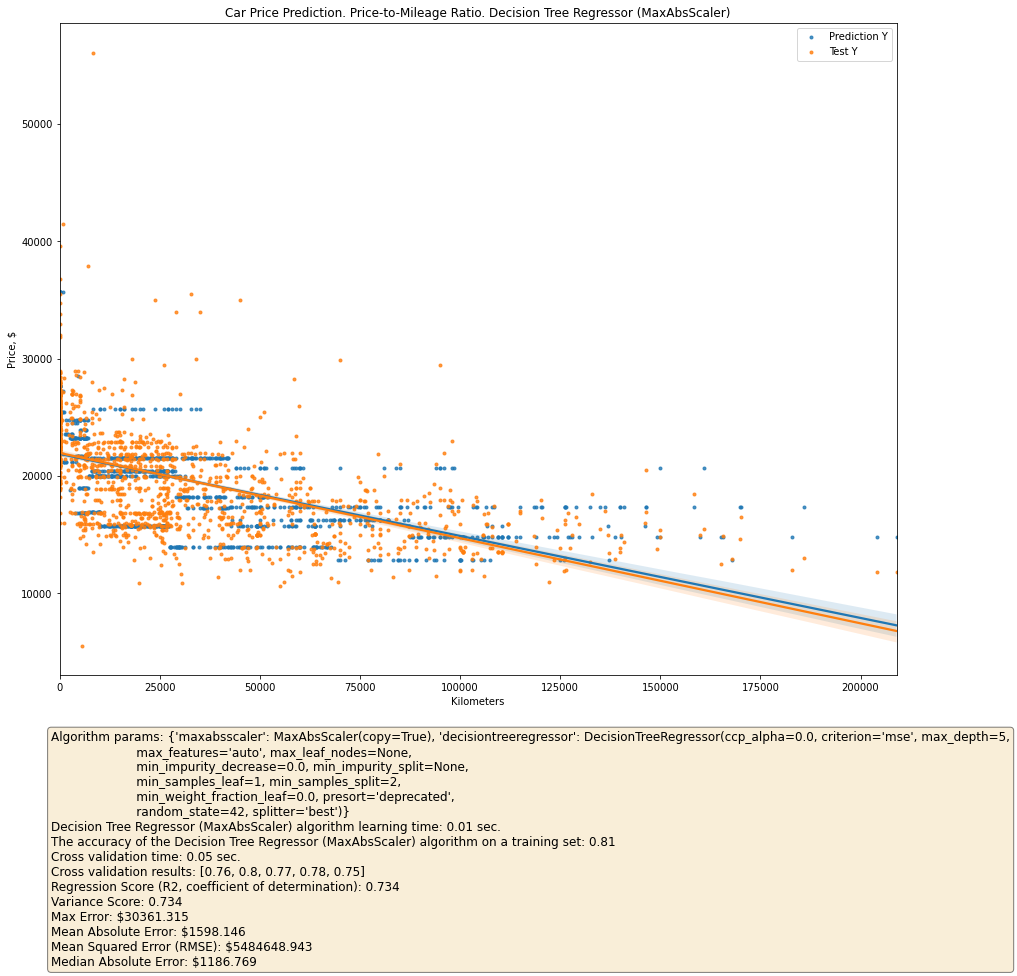

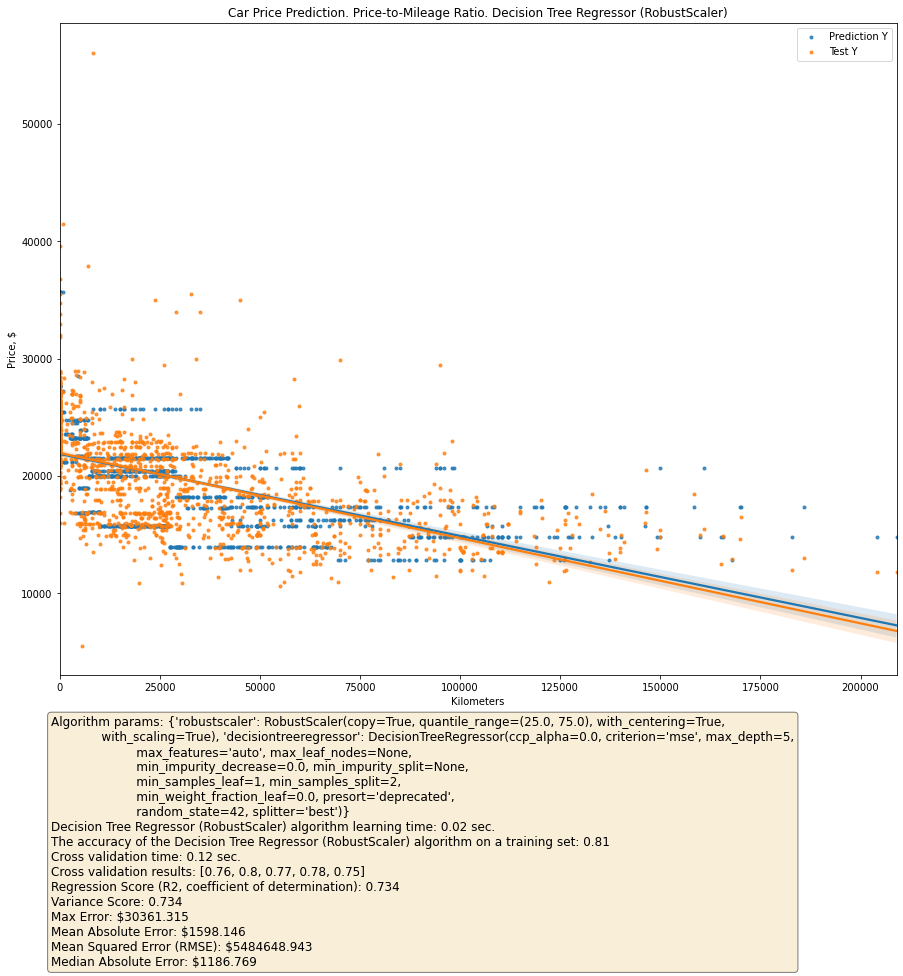

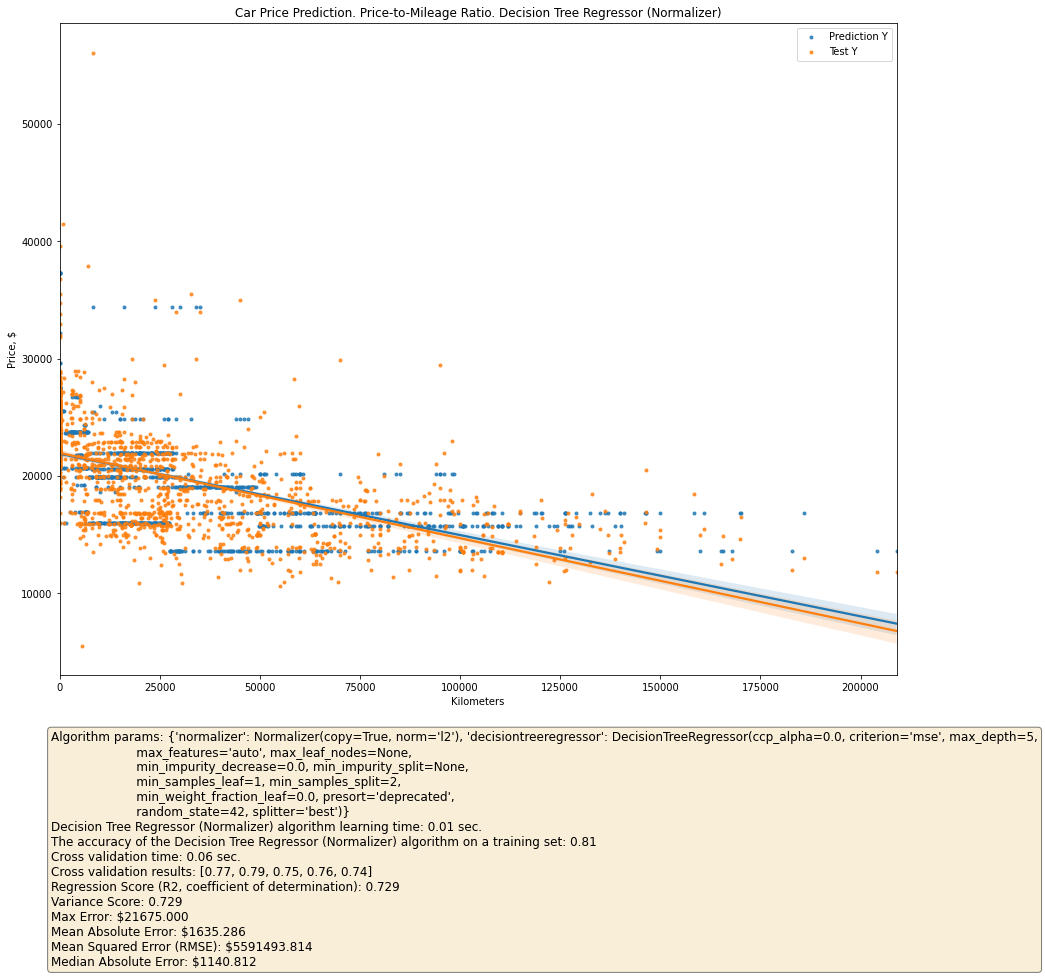

In [91]:
algorithm_name = 'Decision Tree Regressor'
algorithm = DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto', splitter='best', random_state=42)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

### Стохастический градиентный спуск

Применение метода стохастического градиентного спуска для неотмасштабированнных данных

Algorithm params: {'sgdregressor': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)}  
SGD Regressor (not scaled) algorithm learning time: 0.05 sec.  
The accuracy of the SGD Regressor (not scaled) algorithm on a training set: -75742963981687782899712.00  
Cross validation time: 0.28 sec.  
Cross validation results: [-1.0685207056819276e+23, -9.095221440856937e+22, -7.138730206636088e+21, -1.873323421935839e+22, -1.252296481505109e+23]  
Regression Score (R2, coefficient of determination): -64749447943192582291456.000  
Variance Score: -35723842854341792759808.000  
Max Error: $5066943588112881.000  
Mean Absolute Error: $773189253592693.625  
M

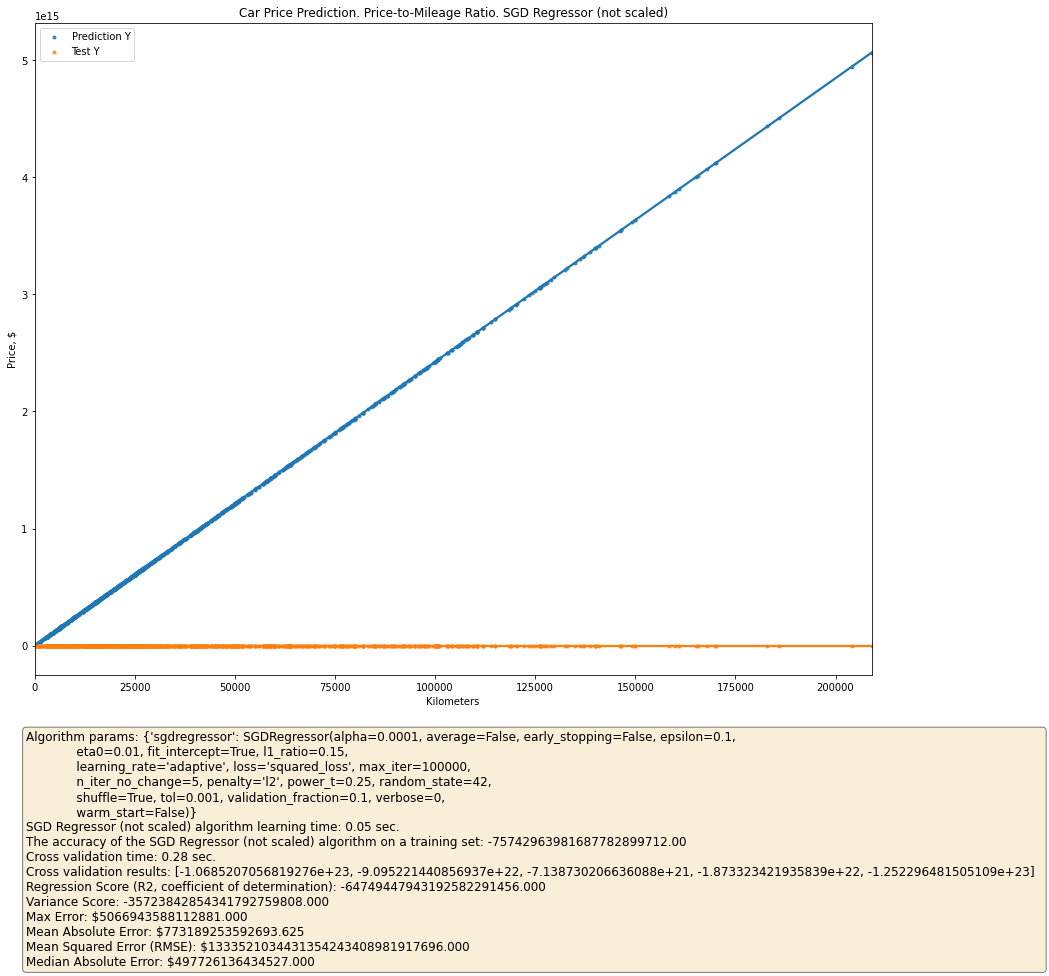

In [92]:
algorithm_name = 'SGD Regressor'
algorithm = SGDRegressor(learning_rate='adaptive', max_iter=100000, tol=1e-3, random_state=42)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, None, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Применение стохастического градиентного спуска для данных, отмасштабированных разными функциями SkLearn

Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'sgdregressor': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)}  
SGD Regressor (StandardScaler) algorithm learning time: 0.03 sec.  
The accuracy of the SGD Regressor (StandardScaler) algorithm on a training set: -3753126116.47  
Cross validation time: 0.16 sec.  
Cross validation results: [-448293194.25, -7098068255.0, -3347633805.97, -915439296.33, -553410752.59]  
Regression Score (R2, coefficient of determination): -1073631713.711  
Variance Score: -1071730974.873  
Max Error: $4154462802.493  
Mean Absolute Error: $56358076.239  
Mean Squared E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Algorithm params: {'robustscaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), 'sgdregressor': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)}  
SGD Regressor (RobustScaler) algorithm learning time: 42.10 sec.  
The accuracy of the SGD Regressor (RobustScaler) algorithm on a training set: 0.67  
Cross validation time: 119.51 sec.  
Cross validation results: [0.67, 0.69, 0.66, 0.65, 0.65]  
Regression Score (R2, coefficient of determination): 0.631  
Variance Score: 0.631  
Max Error: $29485.324  
Mean Absolute Error: $2002.934  
Mean Squared Error (RMSE): $7591156.166  
Median Abso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linea

Algorithm params: {'normalizer': Normalizer(copy=True, norm='l2'), 'sgdregressor': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)}  
SGD Regressor (Normalizer) algorithm learning time: 56.07 sec.  
The accuracy of the SGD Regressor (Normalizer) algorithm on a training set: 0.24  
Cross validation time: 219.32 sec.  
Cross validation results: [0.22, 0.23, 0.23, 0.24, 0.22]  
Regression Score (R2, coefficient of determination): 0.204  
Variance Score: 0.205  
Max Error: $37124.820  
Mean Absolute Error: $3183.322  
Mean Squared Error (RMSE): $16388351.287  
Median Absolute Error: $2928.496



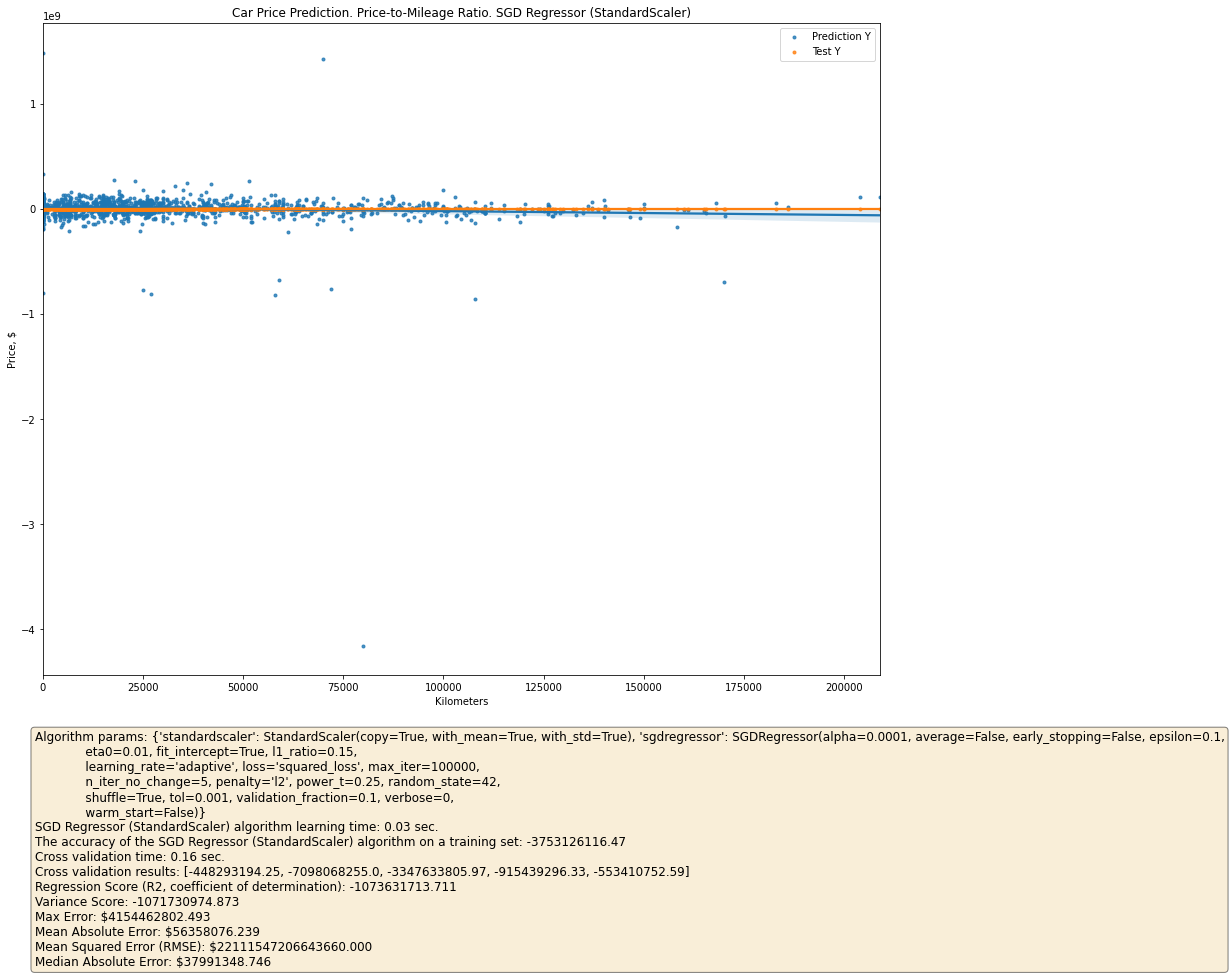

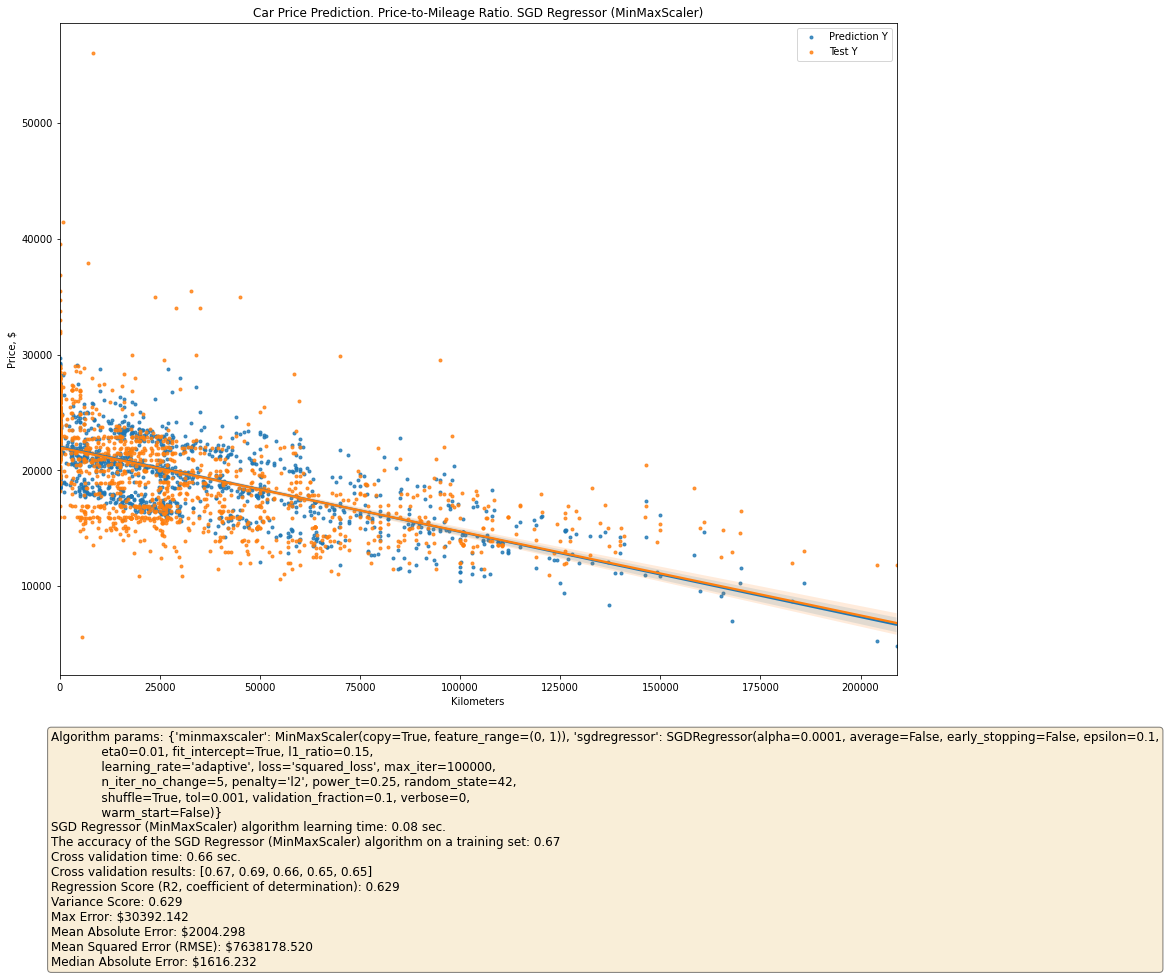

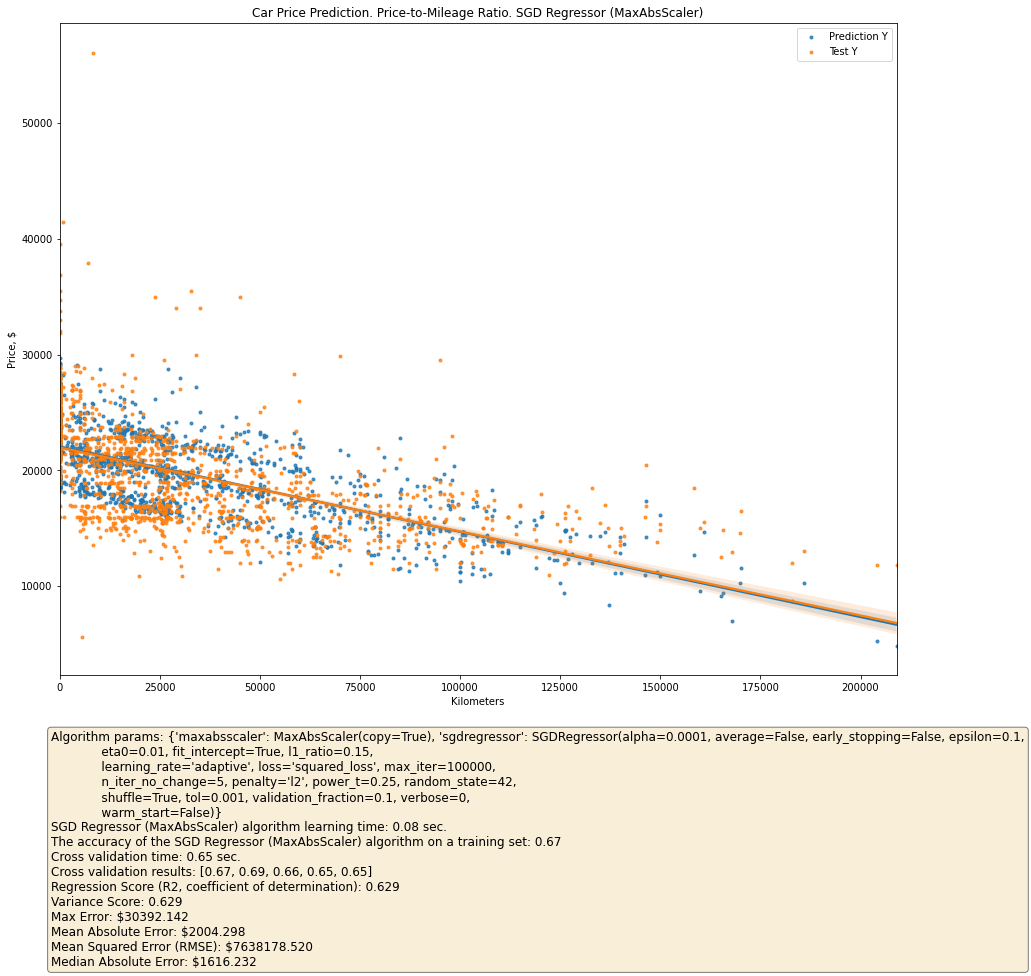

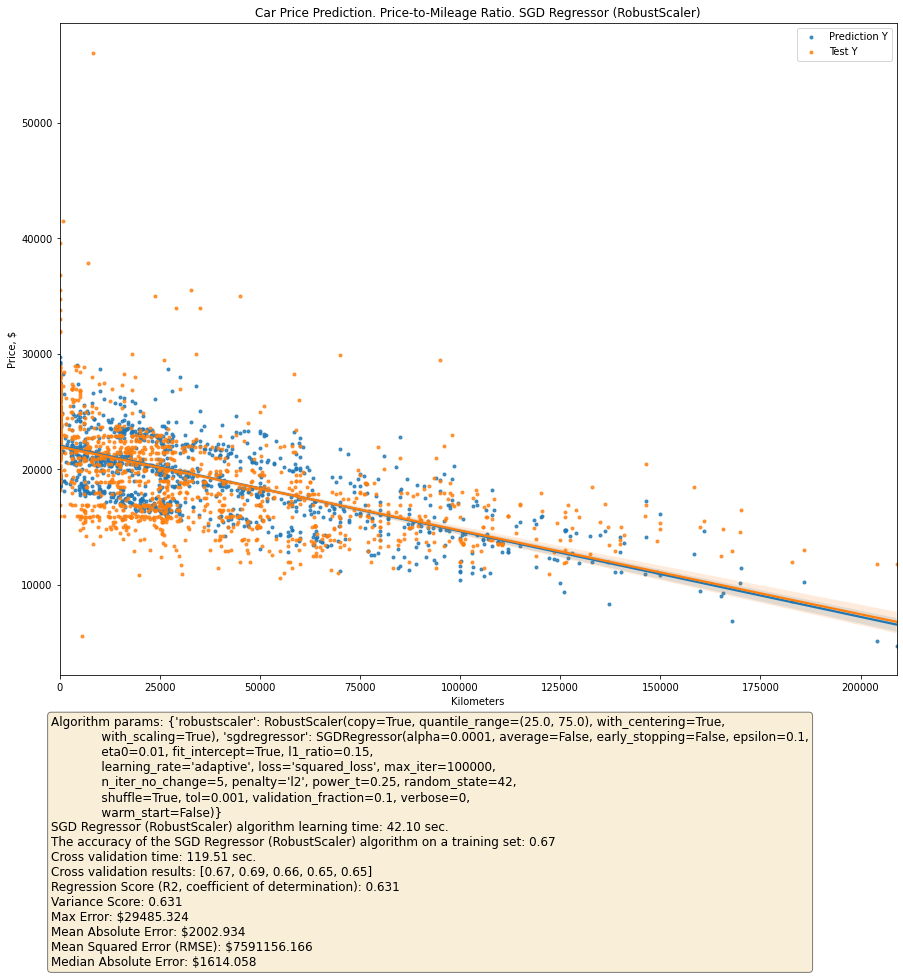

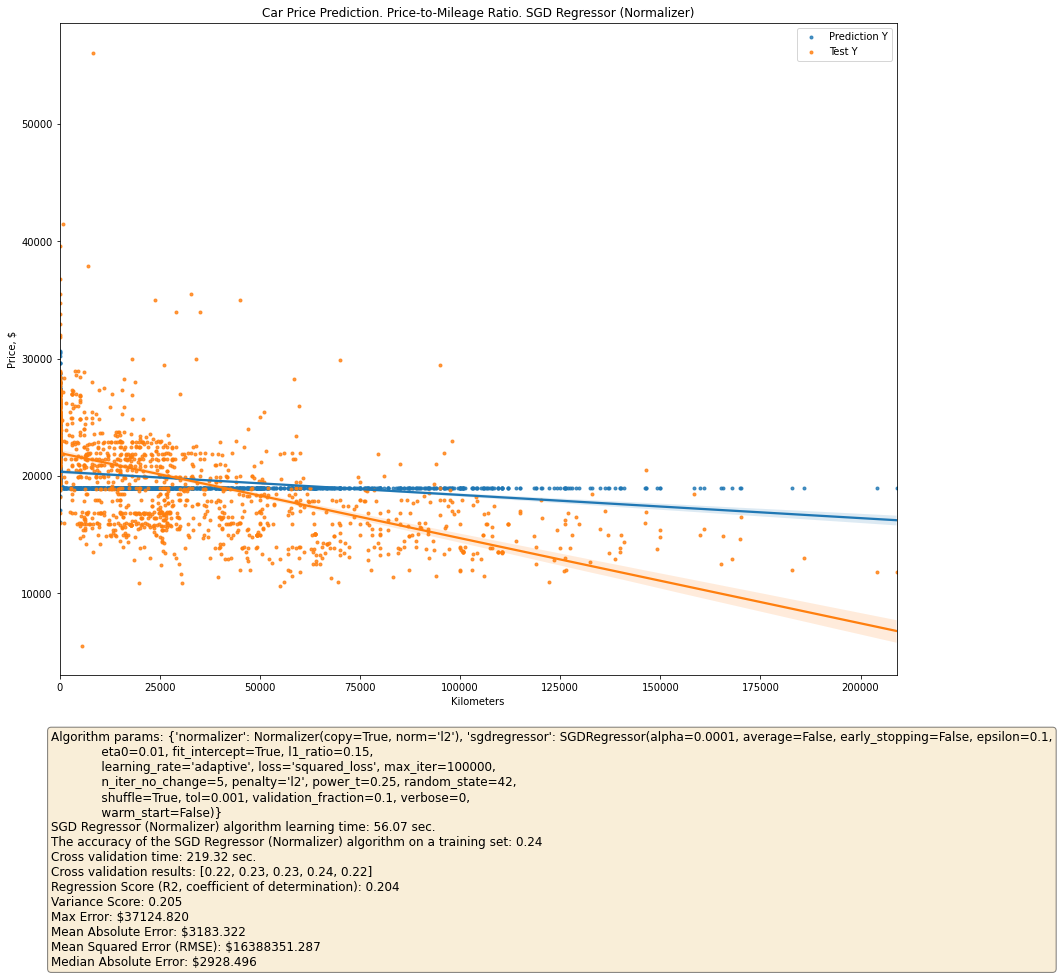

In [93]:
algorithm_name = 'SGD Regressor'
algorithm = SGDRegressor(learning_rate='adaptive', max_iter=100000, tol=1e-3, random_state=42)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

### Линейная регрессия (МНК - метод наименьших квадратов)

Применение методы наименьших квадратов для неотмасштабированнных данных

Algorithm params: {'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)}  
Linear Regression (not scaled) algorithm learning time: 0.03 sec.  
The accuracy of the Linear Regression (not scaled) algorithm on a training set: 0.67  
Cross validation time: 0.04 sec.  
Cross validation results: [0.67, 0.69, 0.66, 0.65, 0.64]  
Regression Score (R2, coefficient of determination): 0.629  
Variance Score: 0.630  
Max Error: $29416.336  
Mean Absolute Error: $2003.556  
Mean Squared Error (RMSE): $7630586.803  
Median Absolute Error: $1611.409



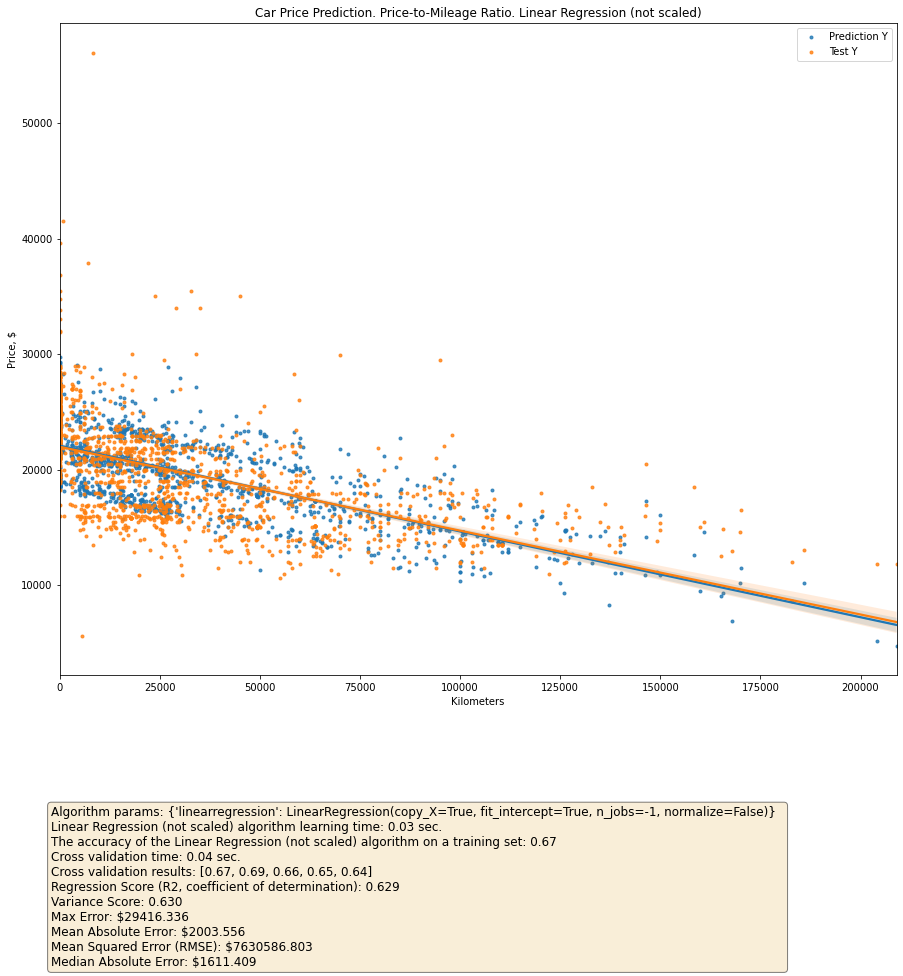

In [95]:
algorithm_name = 'Linear Regression'
algorithm = LinearRegression(n_jobs=-1)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, None, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Применение метода наименьших квадратов для данных, отмасштабированных разными функциями SkLearn

Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)}  
Linear Regression (StandardScaler) algorithm learning time: 0.02 sec.  
The accuracy of the Linear Regression (StandardScaler) algorithm on a training set: 0.67  
Cross validation time: 0.09 sec.  
Cross validation results: [-2.0206901934854173e+22, 0.69, 0.66, -4.423334673796645e+17, -4.3866453806098286e+23]  
Regression Score (R2, coefficient of determination): -67520162916790261776384.000  
Variance Score: -67473273914764845645824.000  
Max Error: $44748644768519872.000  
Mean Absolute Error: $31075447757910.895  
Mean Squared Error (RMSE): $1390584172652208894793094266880.000  
Median Absolute Error: $1622.129

Algorithm params: {'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)} 

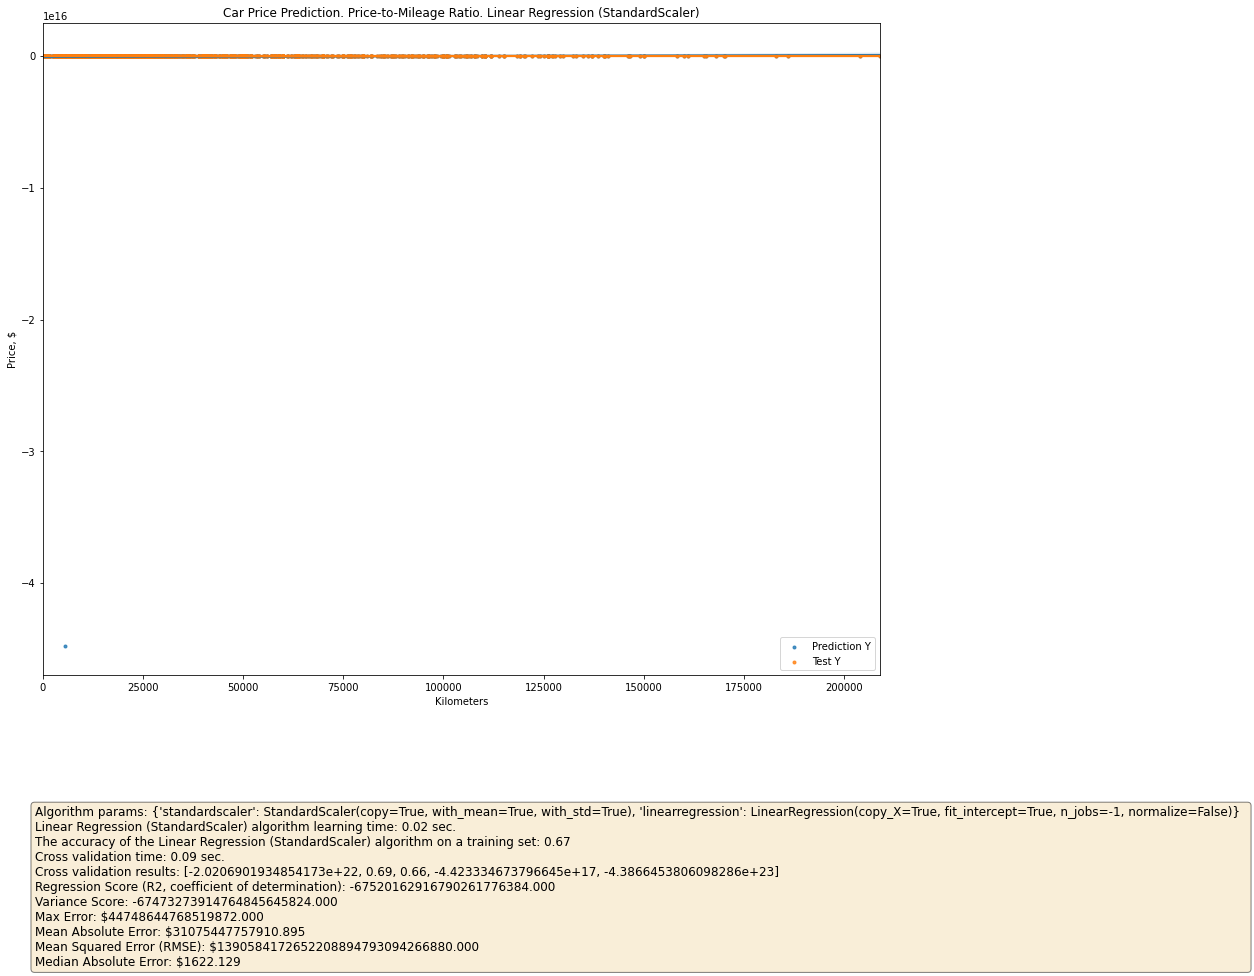

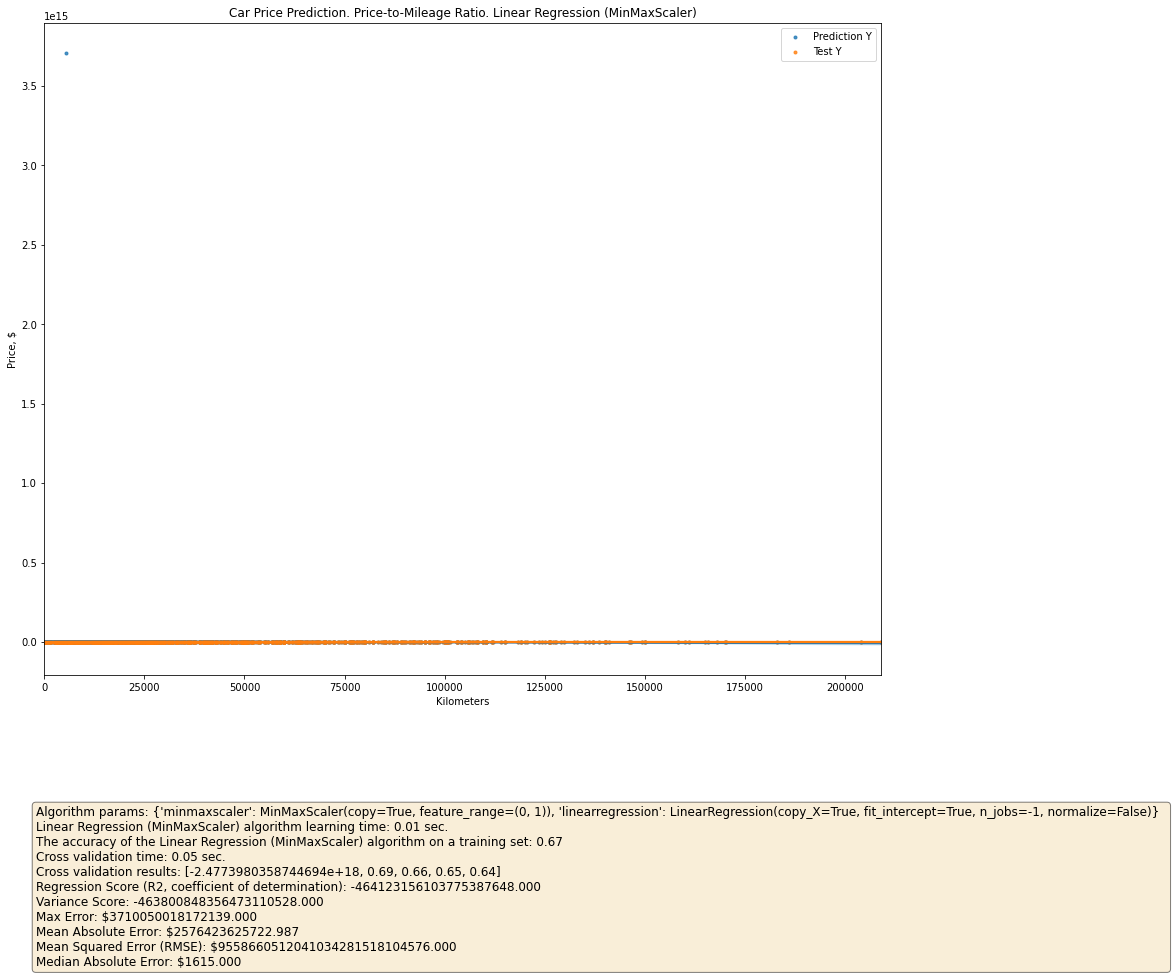

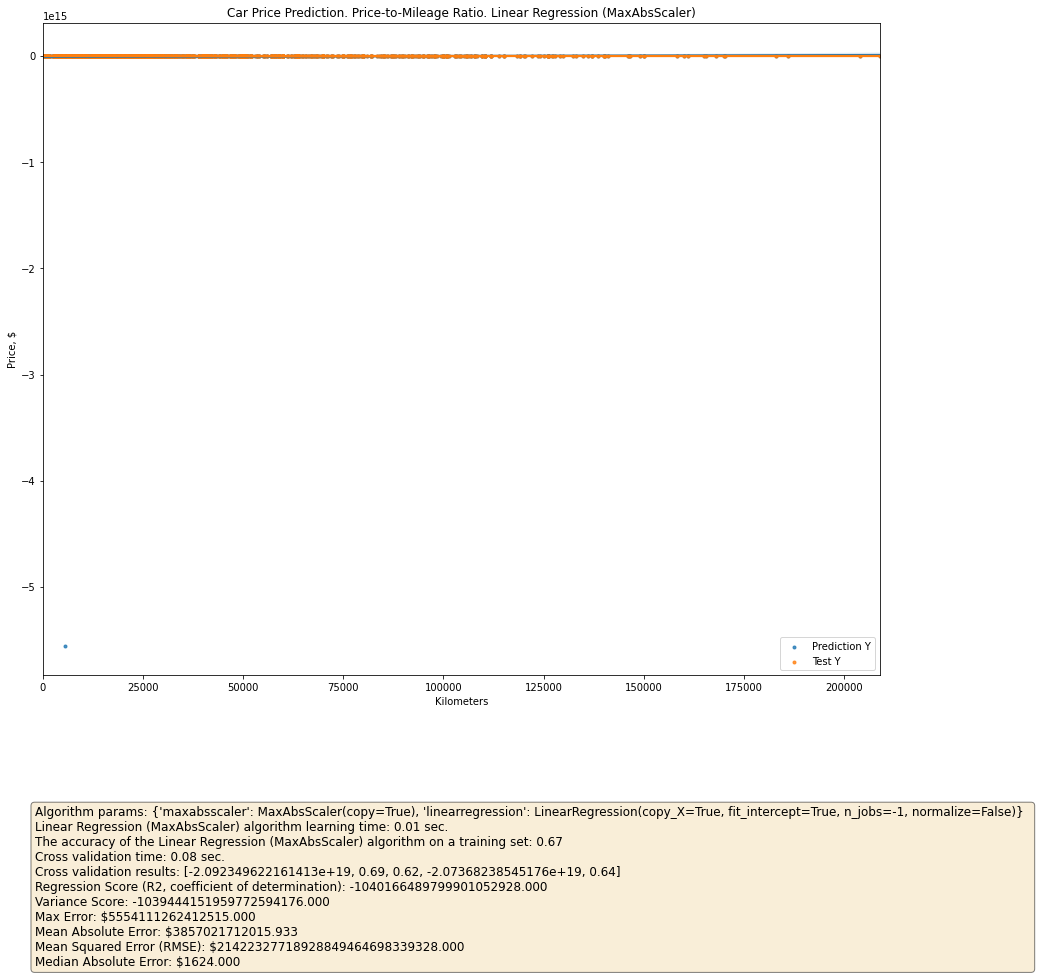

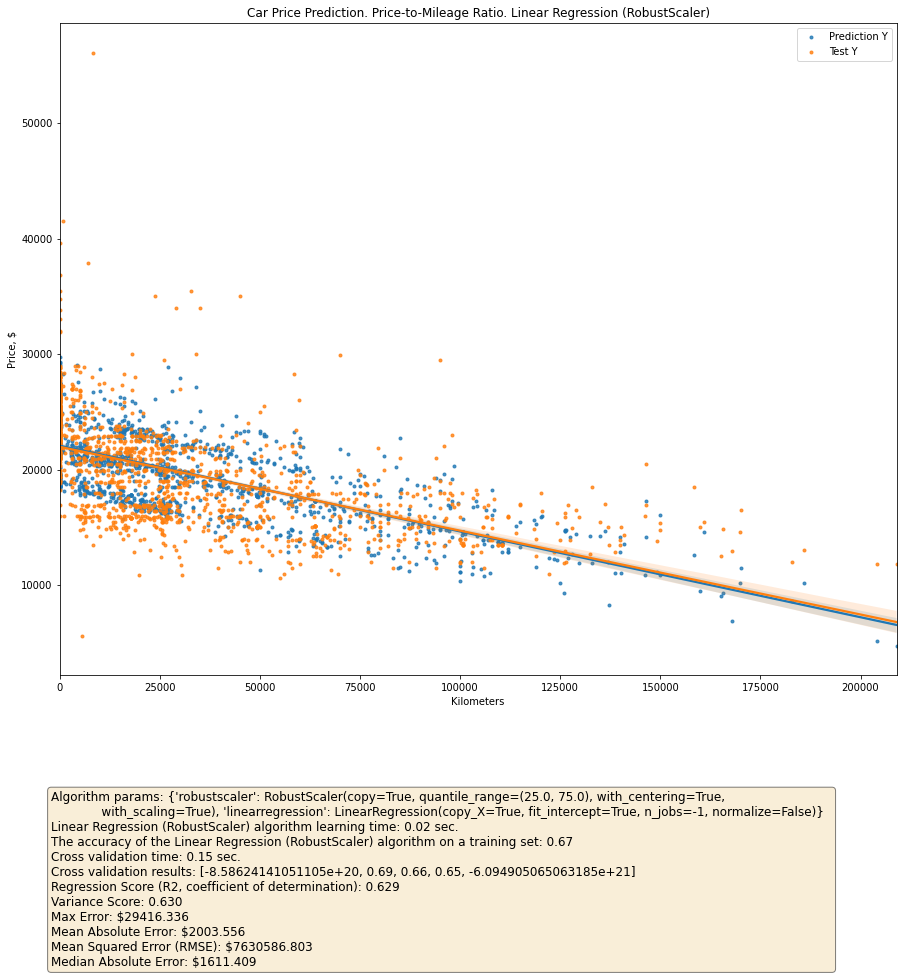

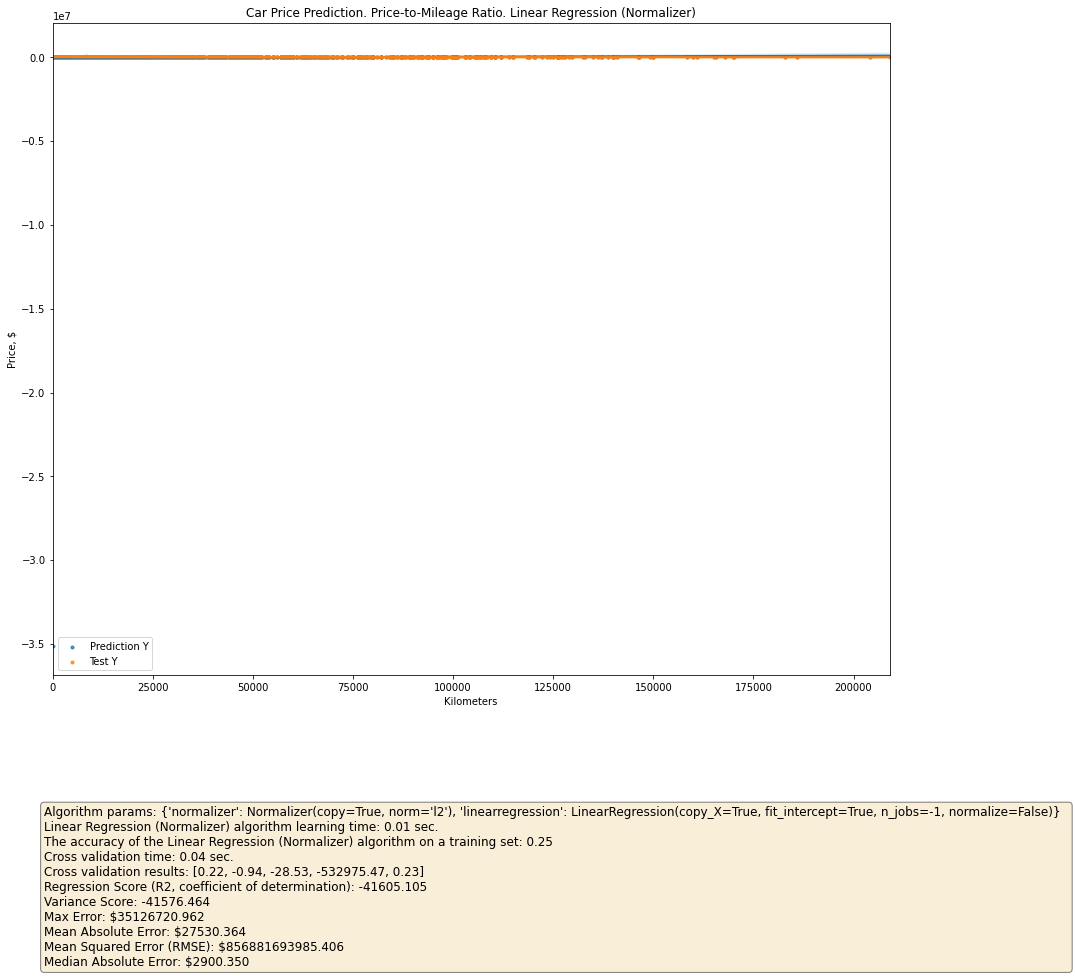

In [96]:
algorithm_name = 'Linear Regression'
algorithm = LinearRegression(n_jobs=-1)
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

### Метод ближайших соседей (KNN)

Применение метода ближайших соседей для неотмасштабированнных данных

Algorithm params: {'kneighborsregressor': KNeighborsRegressor(algorithm='brute', leaf_size=15, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=40, p=1,
                    weights='uniform')}  
KNN (not scaled) algorithm learning time: 0.00 sec.  
The accuracy of the KNN (not scaled) algorithm on a training set: 0.55  
Cross validation time: 0.72 sec.  
Cross validation results: [0.53, 0.56, 0.51, 0.53, 0.44]  
Regression Score (R2, coefficient of determination): 0.466  
Variance Score: 0.466  
Max Error: $35663.550  
Mean Absolute Error: $2378.508  
Mean Squared Error (RMSE): $11000064.102  
Median Absolute Error: $1891.488



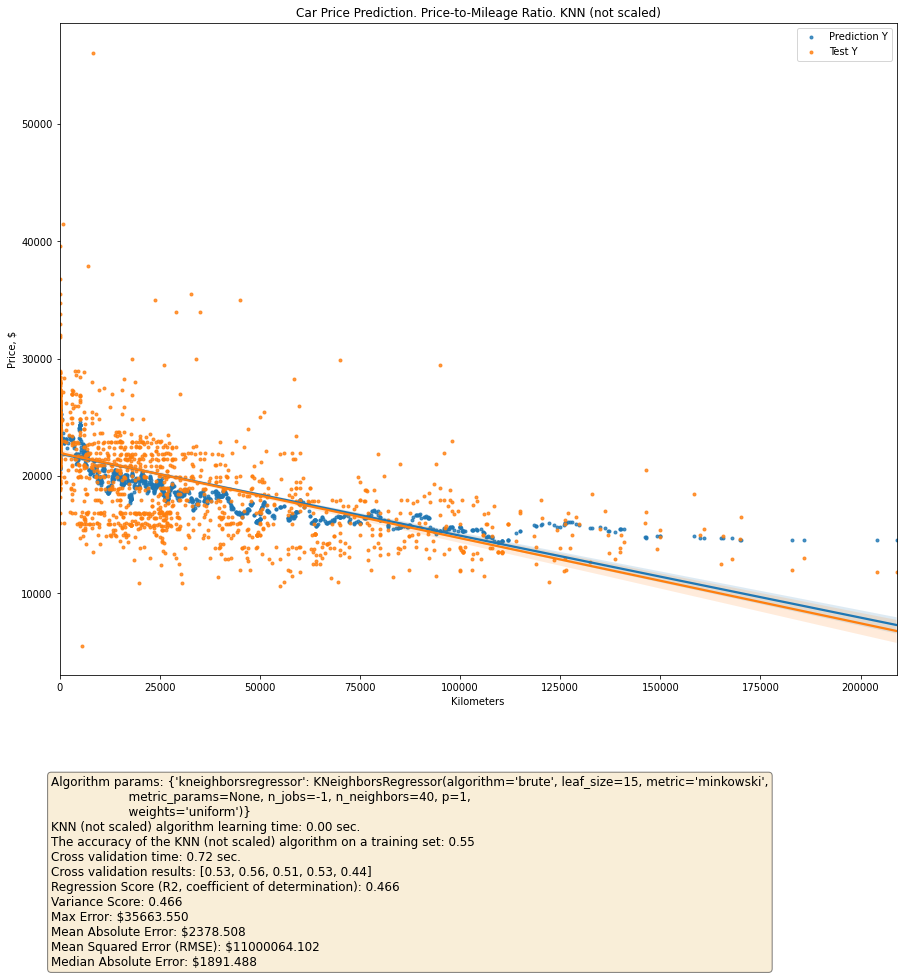

In [97]:
algorithm_name = 'KNN'
algorithm = KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, n_jobs=-1, p=1, weights='uniform')
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, None, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

Применение метода ближайших соседей для данных, отмасштабированных разными функциями SkLearn

Algorithm params: {'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'kneighborsregressor': KNeighborsRegressor(algorithm='brute', leaf_size=15, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=40, p=1,
                    weights='uniform')}  
KNN (StandardScaler) algorithm learning time: 0.01 sec.  
The accuracy of the KNN (StandardScaler) algorithm on a training set: 0.57  
Cross validation time: 0.69 sec.  
Cross validation results: [0.51, 0.57, 0.5, 0.51, 0.49]  
Regression Score (R2, coefficient of determination): 0.531  
Variance Score: 0.534  
Max Error: $31372.725  
Mean Absolute Error: $2290.944  
Mean Squared Error (RMSE): $9654486.517  
Median Absolute Error: $1864.137

Algorithm params: {'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'kneighborsregressor': KNeighborsRegressor(algorithm='brute', leaf_size=15, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=40, p=1,

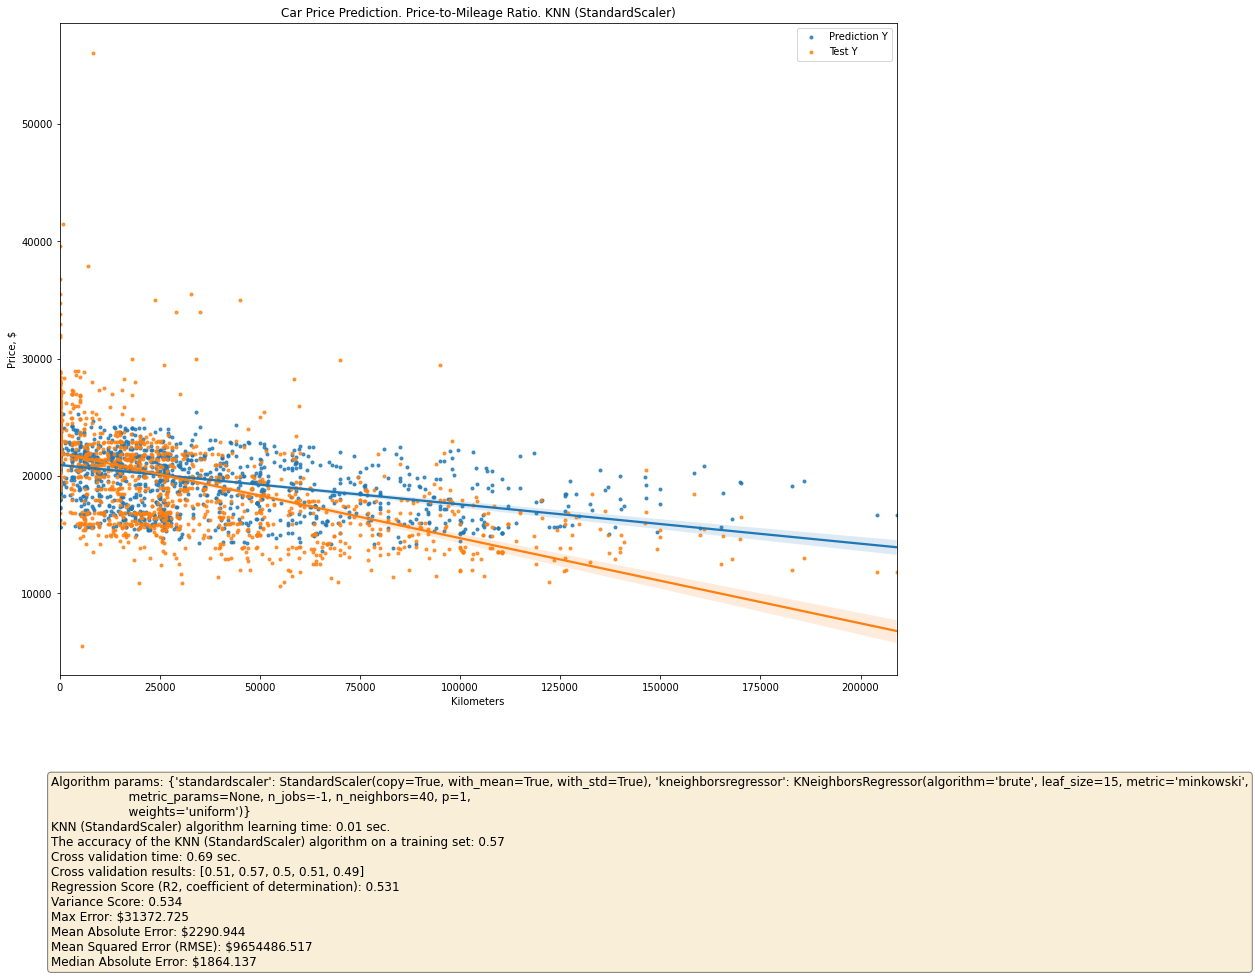

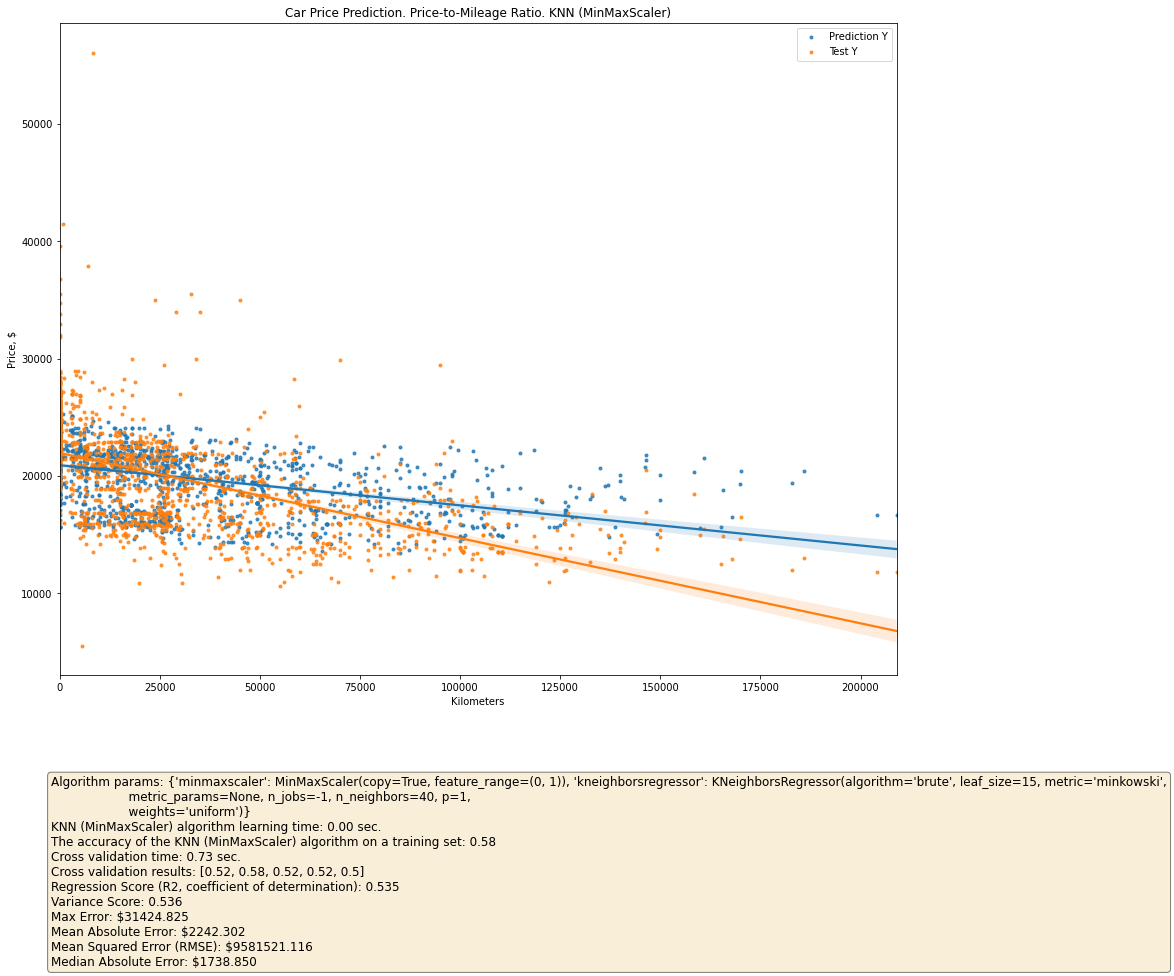

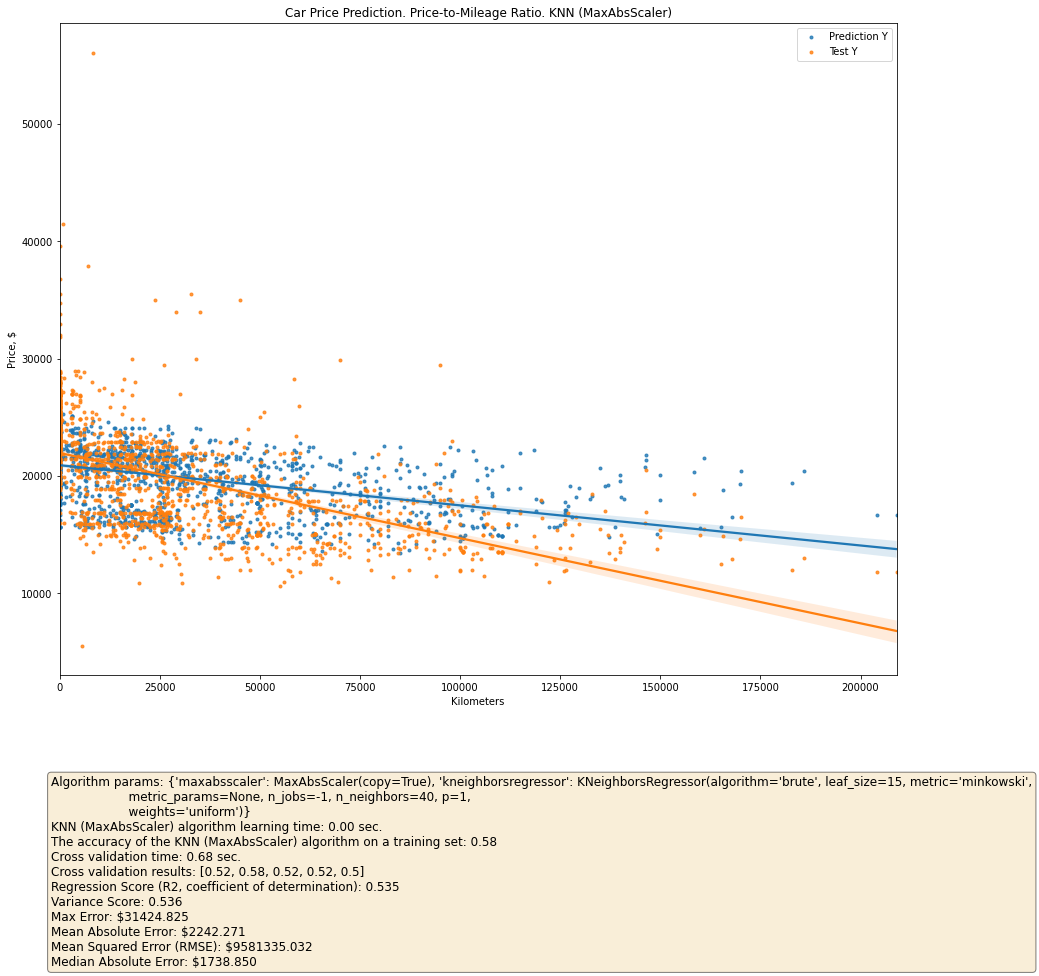

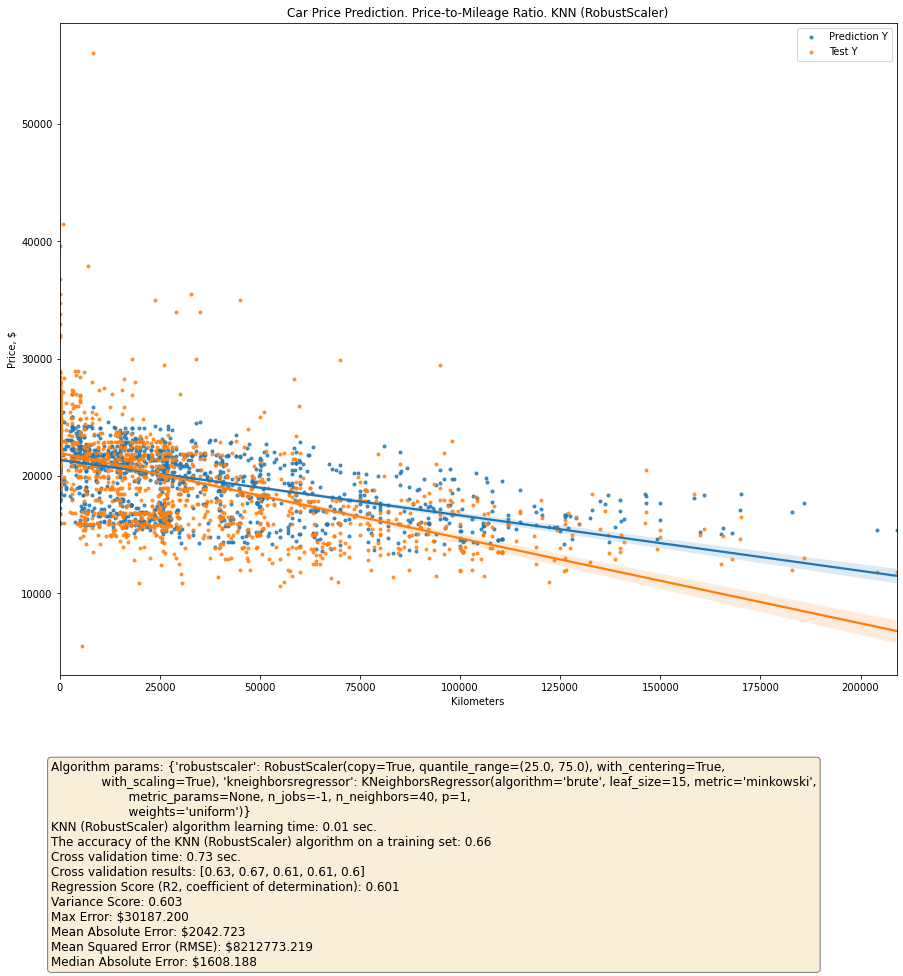

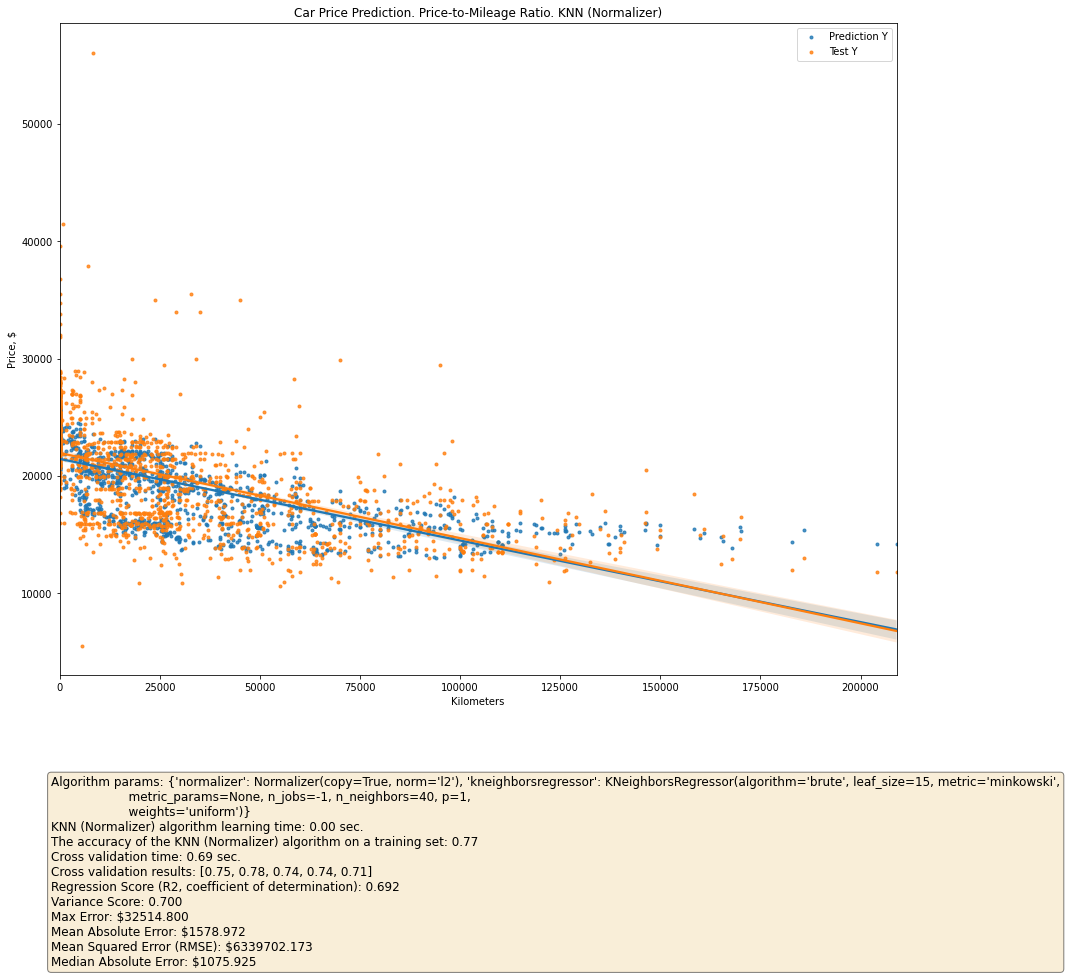

In [98]:
algorithm_name = 'KNN'
algorithm = KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, n_jobs=-1, p=1, weights='uniform')
fast_start_regression(algorithm, x_train, y_train, x_test, y_test, scalers, algorithm_name,  
                      f'Car Price Prediction. Price-to-Mileage Ratio.', img_dir)

## Сравнительная таблица

**SVM params**: *C=10, cache_size=200, coef0=1.0, degree=3, epsilon=0.1, gamma='scale', kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False*

**Logistic Regression params**: *C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False*

**Decision Tree Regressor params:** *ccp_alpha=0.0, criterion='mse', max_depth=5, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=42, splitter='best'*

**SGD Regressor params:** *alpha=0.0001, average=False, early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15, learning_rate='adaptive', loss='squared_loss', max_iter=100000, n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False* 

**KNN params:** *algorithm='brute', leaf_size=15, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=40, p=1, weights='uniform'*

---

|Algorithm|X scaling|Learning Time|Algorithm accurancy on train|Cross-Validation Time|R2|Variance Score|Max Error|Mean Absolute Error|RMSE|Median Absolute Error|
|---|---|---|---|---|---|---|---|---|---|---|
|SVM|Not|1.11 sec.|0.39|3.87 sec.|0.358|0.361|\$34 394.480|\$2 699.884|\$13 219 174.077|\$2 201.854|
|SVM|StandardScaler|1.10 sec.|0.52|3.86 sec.|0.500|0.505|\$25 335.663|\$2 393.652|\$10 301 248.396|\$1 964.938|
|SVM|MinMaxScaler|1.01 sec.|0.38|3.81 sec.|0.367|0.373|\$34 583.573|\$2 673.974|\$13 045 473.850|\$2 238.552|
|SVM|MaxAbsScaler|1.02 sec.|0.38|3.79 sec.|0.367|0.373|\$34 583.573|\$2 673.974|\$13 045 473.850|\$2 238.552|
|SVM|RobustScaler|1.02 sec.|0.68|3.80 sec.|0.617|0.621|\$32 506.572|\$1 942.534|\$7 895 252.412|\$1 469.010|
|SVM|Normalizer|0.95 sec.|0.14|3.39 sec.|0.126|0.129|\$37 099.213|\$3 341.438|\$17 997 337.614|\$3 000.962|
---
|Logistic Regression|Not|15.81 sec.|0.01|56.31 sec.|-1.528|0.030|\$42 600.000|\$5 834.017|\$52 070 840.148|\$5 290.000|
|Logistic Regression|StandardScaler|15.68 sec.|0.31|54.91 sec.|0.497|0.500|\$25 200.000|\$2 193.131|\$10 352 395.965|\$1 490.000|
|Logistic Regression|MinMaxScaler|15.13 sec.|0.14|55.06 sec.|0.177|0.177|\$35 200.000|\$2 946.195|\$16 947 065.553|\$2 105.000|
|Logistic Regression|MaxAbsScaler|15.03 sec.|0.14|54.91 sec.|0.176|0.177|\$35 200.000|\$2 947.653|\$16 961 936.665|\$2 105.000|
|Logistic Regression|RobustScaler|15.33 sec.|0.16|50.81 sec.|0.451|0.452|\$35 200.000|\$2 260.847|\$11 307 884.165|\$1 529.000|
|Logistic Regression|Normalizer|9.39 sec.|0.02|30.54 sec.|-0.106|0.112|\$34 600.000|\$3 785.862|\$22 774 554.509|$3 500.500|
---
|Decision Tree|Not|0.01 sec.|0.81|0.04 sec.|0.734|0.734|\$30 361.315|\$1 598.146|\$5 484 648.943|\$1 186.769|
|Decision Tree|StandardScaler|0.02 sec.|0.81|0.05 sec.|0.734|0.734|\$30 361.315|\$1 598.146|\$5 484 648.943|\$1 186.769|
|Decision Tree|MinMaxScaler|0.01 sec.|0.81|0.04 sec.|0.734|0.734|\$30 361.315|\$1 598.146|\$5 484 648.943|\$1 186.769|
|Decision Tree|MaxAbsScaler|0.01 sec.|0.81|0.05 sec.|0.734|0.734|\$30 361.315|\$1 598.146|\$5 484 648.943|\$1 186.769|
|Decision Tree|RobustScaler|0.02 sec.|0.81|0.12 sec.|0.734|0.734|\$30 361.315|\$1 598.146|\$5 484 648.943|\$ 1186.769|
|Decision Tree|Normalizer|0.01 sec.|0.81|0.06 sec.|0.729|0.729|\$21 675.000|\$1 635.286|\$5 591 493.814|\$1 140.812|
---
|SGD Regressor|Not|0.05 sec.|not valid|0.28 sec.|not valid|not valid|not valid|not valid|not valid|not valid|
|SGD Regressor|StandardScaler|0.03 sec.|not valid|0.16 sec.|not valid|not valid|not valid|not valid|not valid|not valid|
|SGD Regressor|MinMaxScaler|0.08 sec.|0.67|0.66 sec.|0.629|0.629|\$30 392.142|\$2 004.298|\$7 638 178.520|\$1 616.232|
|SGD Regressor|MaxAbsScaler|0.08 sec.|0.67|0.65 sec.|0.629|0.629|\$30 392.142|\$2 004.298|\$7 638 178.520|\$1 616.232|
|SGD Regressor|RobustScaler|42.10 sec.|0.67|119.51 sec.|0.631|0.631|\$29 485.324|\$2 002.934|\$7 591 156.166|\$1 614.058|
|SGD Regressor|Normalizer|56.07 sec.|0.24|219.32 sec.|0.204|0.205|\$37 124.820|\$3 183.322|\$16 388 351.287|\$2 928.496|
---
|Linear Regression|Not|0.03 sec.|0.67|0.04 sec.|0.629|0.630|\$29 416.336|\$2 003.556|\$7 630 586.803|\$1 611.409|
|Linear Regression|StandardScaler|0.02 sec.|0.67|0.09 sec.|not valid|not valid|not valid|not valid|not valid|\$1 622.129|
|Linear Regression|MinMaxScaler|0.01 sec.|0.67|0.05 sec.|not valid|not valid|not valid|not valid|not valid|\$1 615.000|
|Linear Regression|MaxAbsScaler|0.01 sec.|0.67|0.08 sec.|not valid|not valid|not valid|not valid|not valid|\$1 624.000|
|Linear Regression|RobustScaler|0.02 sec.|0.67|0.15 sec.|0.629|0.630|\$29 416.336|\$2 003.556|\$7 630 586.803|\$1 611.409|
|Linear Regression|Normalizer|0.01 sec.|0.25|0.04 sec.|not valid|not valid|not valid|not valid|not valid|\$2 900.350|
---
|KNN|Not|0.00 sec.|0.55|0.72 sec.|0.466|0.466|\$35 663.550|\$2 378.508|\$11 000 064.102|\$1 891.488|
|KNN|StandardScaler|0.01 sec.|0.57|0.69 sec.|0.531|0.534|\$31 372.725|\$2 290.944|\$9 654 486.517|\$1 864.137|
|KNN|MinMaxScaler|0.00 sec.|0.58|0.73 sec.|0.535|0.536|\$31 424.825|\$2 242.302|\$9 581 521.116|\$1 738.850|
|KNN|MaxAbsScaler|0.00 sec.|0.58|0.68 sec.|0.535|0.536|\$31 424.825|\$2 242.271|\$9 581 335.032|\$1 738.850|
|KNN|RobustScaler|0.01 sec.|0.66|0.73 sec.|0.601|0.603|\$30 187.200|\$2 042.723|\$8 212 773.219|\$1 608.188|
|KNN|Normalizer|0.00 sec.|0.77|0.69 sec.|0.692|0.700|\$32 514.800|\$1 578.972|\$6 339 702.173|\$1 075.925|


## Выводы:
1. Наиболее лучший результат показал алгоритмы дерева решений и метода ближайших соседей
2. Большинство рассмотренных алгоритмов работают лучше при отмасштабированных данных
3. Дерево решений работает одинаково как с отмасштабированными данными, так и без
4. Метод стохастического градиентного спуска не сошелся корректно на данных без масштабирования, а также на данных, отмасштабированных с дисперсией = 1 и распределением Гаусса = 0
5. Линейная регрессия (МНК) корректно сошлась на данных без масштабирования, а также на данных отмасштабированных с помощью RobustScaler
6. Результаты алгоритмов дерева решений и KNN меньше всего зависят от масштабирования данных
7. Для некоторых вариантов алгоритмы не сходились за указанное максимальное число итераций (логистическая регрессия, стохастический градиентный спуск)
8. Самым быстрым алгоритмом стал метод дерева решений

**Внимание!**: все результаты и выводы сделаны только на основании данного датасета при указанном варианте разделения данных. Последующие запуски могут дать другие результаты